<a href="https://colab.research.google.com/github/sirvoewodin/portfolio/blob/main/practicum_hackaton_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель хакатона. Этапы работы

__Создание отчета целей обучения студентов Яндекс Практикума.__   

__Цели отчёта:__  
● определить коррелирующие параметры, построить портреты студентов,
сравнить их, чтобы выделить значимые закономерности  
● сегментировать студентов (по 2м и более показателям), выявить
особенности сегментов  
● сформулировать на основе данных гипотезы по улучшению
выстраивания помощи студентам в достижении их целей,  
● оформить выводы и гипотезы аналитиков с помощью инструментов
фигмы для презентации руководству Яндекс Практикума.  


__Ход работы__:  

* Ознакомление с таблицами  
* Предобработка:  
  * Проверка корректности типов данных;  
  * Проверка на дубликаты;  
  * Проверка на пропуски в данных;  
  * Проверка на соответствие данных ТЗ;  
  * Удаление лишней информации;  
  * Преобразование таблиц в более удобный для дальнейшего анализа вид;  
* Анализ:  
  * Распределение пользователей по направлениям, источникам оплаты;
  * Выявление коррелирующих параметров;    
  * Составление портрета студента;    
  * Студенты, нашедшие работу во время обучения;  
  * Вероятность рекомендации курса;  
  * Сегментация студентов по двум признакам и анализ сегментов;  
* Выводы и выдвижение гипотез. 

Важно выдвинуть гипотезы о том, каким группам пользователей требуется помощь (и какая), какая активность важна студентам. 

__Описание данных__  

___data_goals_answers___
* `question_title` — текст вопроса;
* `question_type` — тип вопроса;
* `user_id` — уникальный id пользователя;
* `user_answer` — ответ пользователя на вопрос;
* `answer_date` — время ответа;
* `answer_id` — id ответа;
* `cohort`, `current_cohort` — начальная и текущая когорта студента;
* `course_name`, `topic_name`, `lesson_name` — курс, тема и урок, на котором студент отвечает на вопрос. У нас значения должны быть Трудоустройство-Трудоустройство-Цель обучения, т.к. мы изучаем именно это;
* `original_segment`, `current_segment` — b2c/b2b/b2g — из какого сегмента был/стал студент — сам является клиентом, его обучение оплачивается бизнесом или государством;
* `profession_name` — код профессии;
* `slide_position` — страница опроса (не нужно для анализа).  


___hackathon_metrics___
* `profession_name` — код профессии;
* `user_id` — уникальный id пользователя;
* `lp_avg_user` — средний learning performance. Первые, более высокие значения в таблице с фри-трека, последние с курса, наиболее актуально находящееся в таблице ниже;
* `question_title` — текст вопроса;
* `user_answer` — ответ пользователя на вопрос;
* `statement_content` — формулировка вопроса об уверенности в знаниях; 
* `value` — ответ на вопрос об уверенности в знаниях для расчёта learning experience индекса.

# Ознакомление с данными. Предобработка. 

In [ ]:
# импорт библиотек

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# !pip install openpyxl

In [ ]:
dga = pd.read_excel('/content/data_goals_answers_fin.xlsx')
metrics = pd.read_csv('/content/hackathon_metrics.csv')

In [ ]:
dga.head(3)

,Unnamed: 0,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
0,1,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,определение профессиональной сферы
1,2,3157,2023-09-01 10:43:00,4c9d62c8-beed-4cab-a48a-a7168dbf9fdf,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,Все ок)
2,3,3157,2023-09-01 10:42:00,fe97eac2-5e16-4e28-9aab-83669b4c5629,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:",radio,0,NaN,Трудоустройство,Продвинуться по карьерной лестнице.


In [ ]:
dga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43428 entries, 0 to 43427
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         43428 non-null  int64  
 1   user_id            43428 non-null  int64  
 2   answer_date        43428 non-null  object 
 3   answer_id          43428 non-null  object 
 4   cohort             43428 non-null  object 
 5   course_name        43428 non-null  object 
 6   current_cohort     43428 non-null  object 
 7   current_segment    43223 non-null  object 
 8   lesson_name        43428 non-null  object 
 9   original_segment   43223 non-null  object 
 10  profession_name    43428 non-null  object 
 11  question_title     43428 non-null  object 
 12  question_type      43428 non-null  object 
 13  slide_position     43428 non-null  int64  
 14  statement_content  0 non-null      float64
 15  topic_name         43428 non-null  object 
 16  user_answer        434

In [ ]:
metrics.head(3)

,Unnamed: 0,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
0,0,sql-data-analyst,14641026,0.86,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,"Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?",9.0
1,1,sql-data-analyst,14641026,0.93,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,"Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?",9.0
2,2,data-analyst,14881168,0.48,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN


In [ ]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79117 entries, 0 to 79116
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         79117 non-null  int64  
 1   profession_name    79117 non-null  object 
 2   user_id            79117 non-null  int64  
 3   lp_avg_user        79117 non-null  float64
 4   statement_content  79117 non-null  object 
 5   value              79117 non-null  int64  
 6   question_title     14739 non-null  object 
 7   user_answer        14739 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.8+ MB


In [ ]:
print(dga['user_id'].nunique())
metrics['user_id'].nunique()

3549


9797

В таблицах есть большое отличие по количеству уникальных пользователей. В таблице с ответами их почти в 3 раза меньше, чем в таблице с метриками.  

Вероятно, это связано с тем, что в таблице с ответами приведены данные только по студентам одного курса одного урока, в то время как в другой таблице пользователи за весь рассматриваемый период, на протяжение всего обучения. 

### Проверка на корректность типов данных

В таблице `dga` видим некорректный тип данных для столбца `answer_date`. Нужно заменить его на формат для работы с датой и временем.  

В таблице `metrics` с типами данных все в порядке. 

In [ ]:
dga['answer_date'] = pd.to_datetime(dga['answer_date'], format='%Y-%m-%d %H:%M:%S')

### Проверка на дубликаты

Проверим таблицы на явные дубликаты. 

In [ ]:
print(dga.duplicated().sum())
metrics.duplicated().sum()

0


0

Явных дубликатов в таблицах нет. 

### Проверка на пропуски в данных

По выводу `info` понятно, что в некоторых столбцах есть пропуски. Рассмотрим, что это за столбцы и предположим природу этих пропусков. 

In [ ]:
dga.isna().sum()

Unnamed: 0               0
user_id                  0
answer_date              0
answer_id                0
cohort                   0
course_name              0
current_cohort           0
current_segment        205
lesson_name              0
original_segment       205
profession_name          0
question_title           0
question_type            0
slide_position           0
statement_content    43428
topic_name               0
user_answer             12
dtype: int64

In [ ]:
metrics.isna().sum()

Unnamed: 0               0
profession_name          0
user_id                  0
lp_avg_user              0
statement_content        0
value                    0
question_title       64378
user_answer          64378
dtype: int64

В `dga` нет ни одного значения в столбце `statement_content`, он полностью пустой.  
Также пропуски в сегментах пользователей, по 205. Вероятно, в случае этих столбцов произошла ошибка при сборе данных.  
Также 12 пропусков в ответах студентов. Вероятно, это ответы формата `text`, которые не стали заполнять. Проверим.  

В таблице `metrics` одинаковое количество пропусков в тексте вопроса и ответе на него. Учитывая, что у нас данные по различным спринтам в этой таблице, отстутсвие данных в таком количестве строк может объясняться отсутсвием в некоторых спринтах самого вопроса. 

In [ ]:
dga[dga['user_answer'].isna()]

,Unnamed: 0,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
330,331,38098,2023-09-07 22:03:00,44bdb5ab-b44e-4f57-9f48-ac12590138ed,ds_cohort_97,Трудоустройство,ds_cohort_97,b2c,Цель обучения,b2c,data-scientist,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
2700,2701,376825,2023-07-30 00:38:00,88a3bf97-6d6e-4b0f-b73f-803c8a43f21b,ds_cohort_101,Трудоустройство,ds_cohort_105,b2g,Цель обучения,b2g,data-scientist,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
15624,15625,8436427,2023-07-23 13:15:00,8fa9e024-4086-4475-9d2d-6a38a0c9a7ea,data_cohort_115,Трудоустройство,data_cohort_115,b2c,Цель обучения,b2c,data-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
17416,17417,11468232,2023-07-29 16:04:00,c219003c-44bf-4298-b6e7-e54e76f98b80,data_cohort_111,Трудоустройство,data_cohort_111,b2c,Цель обучения,b2c,data-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
20065,20066,13048896,2023-07-19 13:18:00,b4f84346-fc19-4020-91ba-3ded903f09d1,data_analyst_plus_cohort_31,Трудоустройство,data_analyst_plus_cohort_33,b2c,Цель обучения,b2c,data-analyst-plus,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
25088,25089,14275639,2023-07-11 14:15:00,a71e49ac-2a9f-4ceb-820d-93269d3381a1,ds_plus_cohort_25,Трудоустройство,ds_plus_cohort_25,b2c,Цель обучения,b2c,data-scientist-plus,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
25329,25330,14302144,2023-08-28 19:35:00,d47f96e4-8c5c-4a97-8ecc-ca2de0409186,ds_cohort_107,Трудоустройство,ds_cohort_107,b2g,Цель обучения,b2g,data-scientist,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
30237,30238,14653513,2023-08-10 21:06:00,da6b7a28-1b63-48b6-a5a3-742f486fee85,systems_analyst_cohort_7,Трудоустройство,systems_analyst_cohort_7,b2c,Цель обучения,b2c,systems-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
35421,35422,14960251,2023-07-31 22:30:00,f0c2f646-8f59-428f-ab57-9bedb570a309,data_cohort_119,Трудоустройство,data_cohort_119,b2c,Цель обучения,b2c,data-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN
36734,36735,15011774,2023-09-11 19:25:00,7e194c99-8810-4fd3-802c-978e915491b2,ds_cohort_109,Трудоустройство,ds_cohort_109,b2g,Цель обучения,b2g,data-scientist,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,NaN


В плане пропусков ответов студентов наше предположение оправдалось. Это действительно текстовые ответы, которые либо не выгрузились корректно, либо их проигнорировали студенты. Оставим строки. 

### Проверка на соответствие данных ТЗ

У нас должна быть информация по курсу _Трудоустройство_, теме _Трудоустройство_, уроку _Цель обучения_.  
Столбцы с этими данными находятся в таблице `dga`. 

In [ ]:
print(dga['topic_name'].unique())
print(dga['course_name'].unique())
dga['lesson_name'].unique()

['Трудоустройство']
['Трудоустройство']


array(['Цель обучения'], dtype=object)

Данные по нужным урокам. Более столбцы с этой информацией нам не понадобятся. 

### Удаление лишней информации

В обеих таблицах есть лишние данные.  
Это столбцы `Unnamed: 0`, которые остаются после выгрузки, также в таблице `dga` нам не понадобятся:  
- `topic_name`, `course_name`, `lesson_name` &mdash; информацию из них мы уже использовали;    
- `slide_position`, `statement_content` &mdash; они не несут никакой информации для нас

Также есть дублирующиеся столбцы с сегментом студента (b2b, b2c...).  
Проверим, есть ли пользователи, у которых изменялся этот сегмент, и если таковых нет, то оставим только один из этих столбцов. 

In [ ]:
dga['segment_change'] = dga['current_segment']==dga['original_segment']

In [ ]:
1-dga['segment_change'].mean()

0.027585889288016974

Имеем около 3% пользователей, которые поменяли сегмент. Столбец оставляем. 

In [ ]:
dga = dga.drop(columns=['Unnamed: 0', 'topic_name', 'course_name', 'lesson_name', 
                        'slide_position', 'statement_content'])
metrics = metrics.drop(columns='Unnamed: 0')

### Преобразование таблиц в более удобный вид для дальнейшего анализа

Теперь время подготовить таблице к дальнейшему анализу и построению визуализаций.  

Нам потребуется объединять таблицы, сегментировать студентов по различным признакам, поэтому стоит:  
- В таблице `gda` вынести ответы студентов на вопросы из значений в стобцы;  
- Таблицу `metrics` сгруппировать по пользователям;  
- Объединить таблицы в одну. 

#### Таблица `dga`

In [ ]:
# для начала сделаем копию исходного датасета
# на случай возможного обращения к первоначальным данным

dga_ed = dga.copy()

Нам нужно вынести ответы пользователей из столбцов `user_answer` в столбцы датасета.  

Для этого, во-первых, стоит ознакомиться с имеющимися типами вопросов, их количеству, вариантами ответов.  

При необходимости сгруппировать эти данные, после чего выполнить преобразования. 

##### Типы вопросов, сами вопросы, варианты ответов

In [ ]:
dga_ed['question_type'].unique()

array(['checkbox', 'text', 'radio'], dtype=object)

Итак у нас три типа вопросов. Два из них подразумевают варианты ответов: `checkbox` - возможно несколько вариантов ответа, `radio` - доступен один вариант ответа. `text` - вопросы со свободным ответом.  
В рамках нашей задачи рассматривать ответы типа `text` мы не будем.

In [ ]:
# выбираем строки по вопросам типа `radio` и `checkbox`
dga_ed = dga_ed.query('question_type == "checkbox" or question_type == "radio"')

По типу `radio` проверим, корректно ли распределяется количество ответов на вопросы. 

In [ ]:
# максимальное количество ответов одного пользователя на вопрос типа `radio`
(
    dga_ed[dga_ed['question_type']=='radio']
    .groupby(['answer_id', 'question_title'])
    [['user_answer']].count()
    )['user_answer'].max()

1

Распределение корректное.  

Ознакомимся с самими вопросами и ответами. 

In [ ]:
dga_ed[dga_ed['question_type']=='radio']['question_title'].unique()

array(['Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:',
       'Возможно вы нашли работу за время обучения?',
       'В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.',
       'Планируете ли вы записаться на Карьерный Трек?'], dtype=object)

In [ ]:
dga_ed[dga_ed['question_type']=='checkbox']['question_title'].unique()

array(['Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'],
      dtype=object)

Есть четыре вопроса типа `radio` и один `checkbox`.  

Они имеют очень длинные формулировки, поэтому создадим для них алиасы. 

In [ ]:
# создаем список с вопросами и список алиасов
radio_q = list(dga_ed[dga_ed['question_type']=='radio']['question_title'].unique())
radio_alias = ['Цель обучения', "Возможно вы нашли работу за время обучения?", 
               "Был опыт в IT?", 'Планируете ли вы записаться на Карьерный Трек?', 'Над чем хотите работать']

In [ ]:
# добавляем к вопросам радио вопрос чекбокс
radio_q.append(dga_ed[dga_ed['question_type']=='checkbox']['question_title'].unique()[0])

In [ ]:
radio_q

['Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:',
 'Возможно вы нашли работу за время обучения?',
 'В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.',
 'Планируете ли вы записаться на Карьерный Трек?',
 'Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.']

In [ ]:
# заменяем длинные вопросы на короткие алиасы
for i in range(len(radio_q)):
  dga_ed = dga_ed.replace(radio_q[i], radio_alias[i])

Вопросы привели в порядок, теперь рассмотрим ответы. 

In [ ]:
for i, v in enumerate(radio_alias):
  print(v)
  print()
  print(dga_ed[dga_ed['question_title']==v]['user_answer'].unique())
  print()

Цель обучения

['Продвинуться по карьерной лестнице.' 'Сменить работу.'
 'Развить свой бизнес. ' 'Структурировать уже полученные навыки и знания.'
 'Получить новые навыки для общего развития.'
 'Получить новые знания, чтобы повысить зарплату.'
 'Нет определённой цели в обучении.']

Возможно вы нашли работу за время обучения?

['Да' 'Нет' 'В активном поиске']

Был опыт в IT?

['Нет опыта работы в IT и в направлении Анализа данных.'
 'От 1 года опыта работы в другом направлении IT.'
 'Более 3 лет опыта работы в направлении Анализа данных.'
 'Более 3 лет опыта работы аналитиком.'
 'От 1 до 3 лет опыта работы направлении Анализа данных.'
 'Менее 1 года опыта работы в другом направлении IT.'
 'От 1 до 3 лет опыта работы аналитиком.'
 'Нет опыта работы аналитиком и в IT.'
 'Менее года опыта работы в направлении Анализа данных.'
 'Нет опыта работы аналитиков и в IT.'
 'Менее года опыта работы аналитиком.']

Планируете ли вы записаться на Карьерный Трек?

['Да, планирую записаться после диплом

Видим, что в вариантах ответа относительно опыта в IT есть очень похожие варианты, как то `'Более 3 лет опыта работы в направлении Анализа данных.'` и `'Более 3 лет опыта работы аналитиком.'`. Похоже, что это опросы из курсов по анализу данных и системному анализу, поэтому очень похожие, но не идентичные формулировки.  

В рамках нашей задачи эта разница не критична, поэтому все похожие ответы мы объедимим в один. 

In [ ]:
# готовим списки для замены ответов
to_replace = ['Более 3 лет опыта работы в направлении Анализа данных.', 'Нет опыта работы в IT и в направлении Анализа данных.', 
              'От 1 до 3 лет опыта работы направлении Анализа данных.', 'Менее года опыта работы в направлении Анализа данных.',
              'Нет опыта работы аналитиков и в IT.']
new_list = ['Более 3 лет опыта работы аналитиком.', 'Нет опыта работы аналитиком и в IT.', 
            'От 1 до 3 лет опыта работы аналитиком.', 'Менее года опыта работы аналитиком.',
            'Нет опыта работы аналитиком и в IT.']

In [ ]:
# в цикле меняем ответы на уникальные
for i in range(len(to_replace)):
  dga_ed = dga_ed.replace(to_replace[i], new_list[i])

In [ ]:
dga_ed[dga_ed['question_title']=='Был опыт в IT?']['user_answer'].unique()

array(['Нет опыта работы аналитиком и в IT.',
       'От 1 года опыта работы в другом направлении IT.',
       'Более 3 лет опыта работы аналитиком.',
       'От 1 до 3 лет опыта работы аналитиком.',
       'Менее 1 года опыта работы в другом направлении IT.',
       'Менее года опыта работы аналитиком.'], dtype=object)

Значения подготовили. Теперь время преобразовать вид таблицы. 

##### Превращение из длинной таблицы в широкую

Для начала добавим к каждому ответу индекс его вопроса. Это нужно чтобы при переводе таблицы в широкую форму мы могли избавиться от мультииндекса, но сохранить понимание контекста. 

In [ ]:
# добавляем в начало ответа строку вопроса, к корому он относится
dga_ed['user_answer'] = dga_ed['question_title']+'_'+dga_ed['user_answer']

In [ ]:
dga_ed.head()

,user_id,answer_date,answer_id,cohort,current_cohort,current_segment,original_segment,profession_name,question_title,question_type,user_answer,segment_change
0,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,Над чем хотите работать,checkbox,Над чем хотите работать_определение профессиональной сферы,True
2,3157,2023-09-01 10:42:00,fe97eac2-5e16-4e28-9aab-83669b4c5629,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,Цель обучения,radio,Цель обучения_Продвинуться по карьерной лестнице.,True
3,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,Над чем хотите работать,checkbox,Над чем хотите работать_персональная карьерная консультация,True
4,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,Над чем хотите работать,checkbox,Над чем хотите работать_устройство рынка труда,True
5,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,Над чем хотите работать,checkbox,Над чем хотите работать_как и куда можно расти как специалисту,True


Теперь добавляем столбцы. 

In [ ]:
# делаем сводник, в котором ответы на вопросы перемещаются в столбцы таблицы
dga_wide = dga_ed.pivot_table(index=['user_id', 'cohort', 
                                     'current_cohort', 'current_segment', 
                                     'original_segment',  'profession_name'], 
                                    columns='user_answer', values='answer_id', 
                                    aggfunc='nunique').reset_index()

In [ ]:
dga_wide.head()

user_answer,user_id,cohort,current_cohort,current_segment,original_segment,profession_name,Был опыт в IT?_Более 3 лет опыта работы аналитиком.,Был опыт в IT?_Менее 1 года опыта работы в другом направлении IT.,Был опыт в IT?_Менее года опыта работы аналитиком.,Был опыт в IT?_Нет опыта работы аналитиком и в IT.,Был опыт в IT?_От 1 года опыта работы в другом направлении IT.,Был опыт в IT?_От 1 до 3 лет опыта работы аналитиком.,Возможно вы нашли работу за время обучения?_В активном поиске,Возможно вы нашли работу за время обучения?_Да,Возможно вы нашли работу за время обучения?_Нет,Над чем хотите работать_как говорить про повышение,Над чем хотите работать_как и куда можно расти как специалисту,"Над чем хотите работать_не думаю, что вы можете мне с чем-то помочь",Над чем хотите работать_определение профессиональной сферы,Над чем хотите работать_определение стратегии поиска работы,Над чем хотите работать_оформление портфолио,Над чем хотите работать_оценка шансов на трудоустройство,Над чем хотите работать_персональная карьерная консультация,Над чем хотите работать_прохождение собеседований,Над чем хотите работать_резюме,Над чем хотите работать_решение тестовых заданий,Над чем хотите работать_сопроводительное письмо,Над чем хотите работать_устройство рынка труда,"Планируете ли вы записаться на Карьерный Трек?_Да, планирую записаться после диплома","Планируете ли вы записаться на Карьерный Трек?_Да, уже записался","Планируете ли вы записаться на Карьерный Трек?_Нет, не планирую",Цель обучения_Нет определённой цели в обучении.,"Цель обучения_Получить новые знания, чтобы повысить зарплату.",Цель обучения_Получить новые навыки для общего развития.,Цель обучения_Продвинуться по карьерной лестнице.,Цель обучения_Развить свой бизнес.,Цель обучения_Сменить работу.,Цель обучения_Структурировать уже полученные навыки и знания.
0,3157,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,5415,data_cohort_117,data_cohort_119,b2g,b2g,data-analyst,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,8199,data_cohort_103,data_cohort_103,b2c,b2c,data-analyst,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,8215,ds_cohort_101,ds_cohort_101,b2c,b2c,data-scientist,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,10202,data_analyst_plus_cohort_31,data_analyst_plus_cohort_31,b2g,b2g,data-analyst-plus,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
# заполняем пропуски нулями
dga_wide = dga_wide.fillna(0)

Широкая таблица готова. Теперь подготовим таблицу `metrics`.

#### Таблица `metrics`

Эту таблицу мы сгруппируем по айди пользователя и коду профессии. 

In [ ]:
metrics.head()

,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
0,sql-data-analyst,14641026,0.860000,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,"Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?",9.0
1,sql-data-analyst,14641026,0.930000,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,"Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?",9.0
2,data-analyst,14881168,0.480000,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN
3,data-analyst,14881168,0.426667,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN
4,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN


In [ ]:
# группируем таблицу по пользователям и профессиям
# получаем средние значения уверенности в силах, рекомендаций, и последний показатель успеваемости
metrics_gr = metrics.groupby(['user_id', 'profession_name'])\
.agg({'lp_avg_user':'last', 'value':'mean', 'user_answer':'mean'})\
.reset_index()

In [ ]:
metrics_gr.head()

,user_id,profession_name,lp_avg_user,value,user_answer
0,377,data-scientist,0.794,1.333333,NaN
1,774,data-analyst-plus,0.666,0.000000,NaN
2,802,data-analyst,0.865,0.000000,NaN
3,1282,data-analyst,0.570,0.500000,NaN
4,1400,data-scientist,0.750,0.250000,NaN


In [ ]:
# даем новые названия колонкам
metrics_gr.columns = ['user_id', 'profession_name', 'lp_avg', 'confidence', 'chance_of_recomendation']

#### Объединение таблиц

In [ ]:
# соединяем по всем общим значениям наши таблицы
data_gen = dga_wide.merge(metrics_gr, on=['user_id', 'profession_name'], how='inner')

In [ ]:
data_gen['user_id'].nunique()

3141

In [ ]:
# доля оставшихся пользователей от исходных данных
data_gen['user_id'].nunique()/dga['user_id'].nunique()

0.8850380388841927

Мы получили сводную таблицу со всеми данными. В ней осталось 3141 уникальных `user_id`. Это 88.5% от изначального числа. 

##### Масштабирование значений `confidence` в интервал [0; 1]

Чтобы мы могли более точно сравнивать значения уверенности в собственных знаниях по группам, заменим ответы из интервала **[-2; 2]** на интервал **[0; 1]**. Так мы можем оценивать уверенность студентов в процентах. 

In [ ]:
# список для значений нового столбца
scaled_confidence = []

# функция для их вычисления
def scale_conf (row):
    for i, v in enumerate(row['confidence']):
        x = (v - row['confidence'].min()) / (row['confidence'].max() - row['confidence'].min())
        scaled_confidence.append(x)

In [ ]:
scale_conf(data_gen)

In [ ]:
# столбец с отредактированным значением уверенности в знаниях
data_gen['scaled_confidence'] = scaled_confidence

# Анализ

## Распределение пользователей по источникам, курсам

In [ ]:
df_users = data_gen[['user_id', 'current_segment', 'profession_name']]
df_users_seg = df_users.groupby('current_segment')['user_id'].nunique().reset_index()

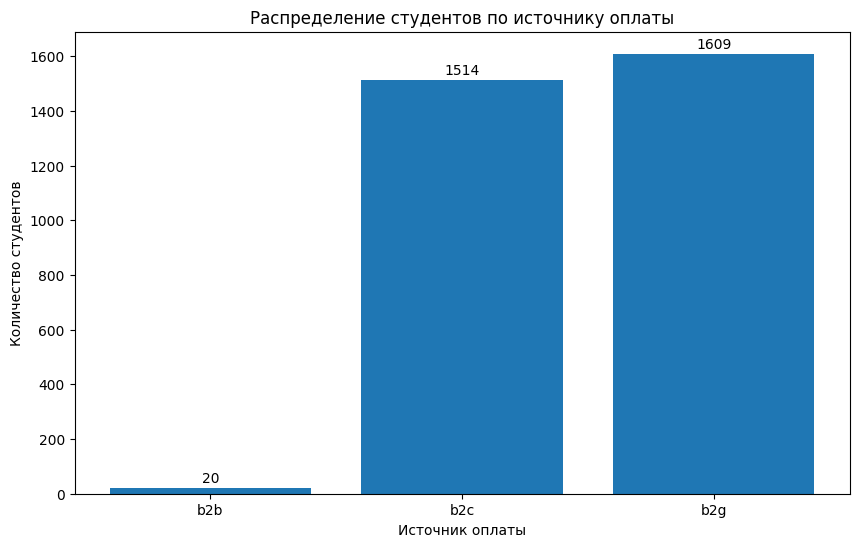

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_users_seg['current_segment'], df_users_seg['user_id'])
ax.set(title='Распределение студентов по источнику оплаты', xlabel='Источник оплаты', ylabel='Количество студентов')
plt.tick_params(axis='x', rotation=0)

# Добавляем текстовые аннотации
for i, acdm in enumerate(df_users_seg['user_id']):
    ax.text(i, acdm+20, acdm, horizontalalignment='center')



Лидеры по количеству студентов &mdash; сегменты `b2c` и `b2g`.

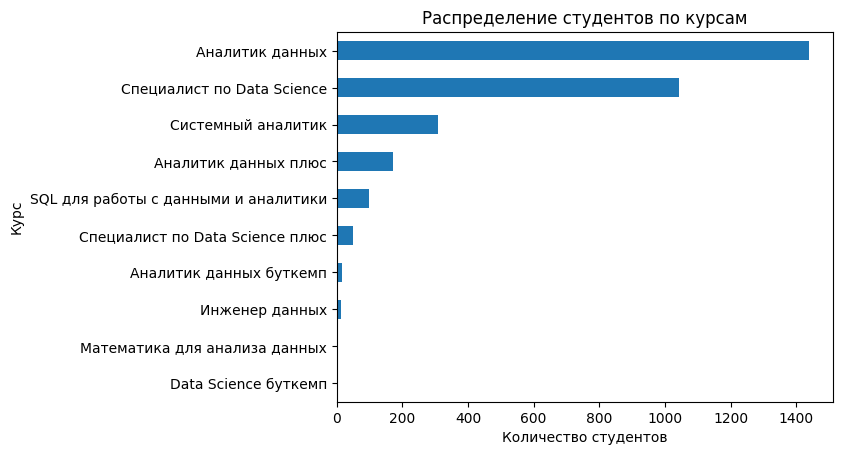

In [ ]:
# и распределение их по курсам

df_users.groupby('profession_name')[['user_id']].nunique().\
sort_values('user_id').plot(kind='barh')
plt.title('Распределение студентов по курсам')
plt.xlabel('Количество студентов')
plt.ylabel('Курс')
plt.yticks(np.arange(10), ['Data Science буткемп', 'Математика для анализа данных', 'Инженер данных', 
                           'Аналитик данных буткемп', 'Специалист по Data Science плюс', 
                           'SQL для работы с данными и аналитики', 'Аналитик данных плюс', 'Системный аналитик', 
                           'Специалист по Data Science', 'Аналитик данных'])
plt.legend().remove()

Самый популярный курс среди рассматриваемых &mdash; Аналитик данных. За ним идут DS и Системный анализ. Все остальные курсы очень малочисленные.  

In [ ]:
# количество студентов по курсам
df_users.groupby('profession_name')[['user_id']].nunique().\
sort_values('user_id', ascending=False)

,user_id
profession_name,
data-analyst,1439
data-scientist,1042
systems-analyst,308
data-analyst-plus,171
sql-data-analyst,98
data-scientist-plus,49
data-analyst-bootcamp,17
data-engineer,12
data-science-bootcamp,5


#### Вывод по распределению студентов

В нашей выборке наибольшее количество пользователей пришли по программе b2g, почти столько же по b2c. Студентов от бизнеса крайне мало.  

Среди курсов выделяются `data-analyst` и `data-scientist`, на них учатся подавляющее количество студентов. Меньше всего учеников на направлениях буткемпа, дата инжинеров, математики. 

## Показатели `learning perfomance` и вероятность рекомендации по курсам и по источникам оплаты

Рассмотрим распределение индекса успеваемости и вероятности рекомендации курса друзьям в разбивке по курсам и по источникам оплаты. 

In [ ]:
# подготовим для этого датасет
df_lp = data_gen[['user_id', 'current_segment', 'profession_name', 
                  'lp_avg', 'chance_of_recomendation', 'scaled_confidence']]

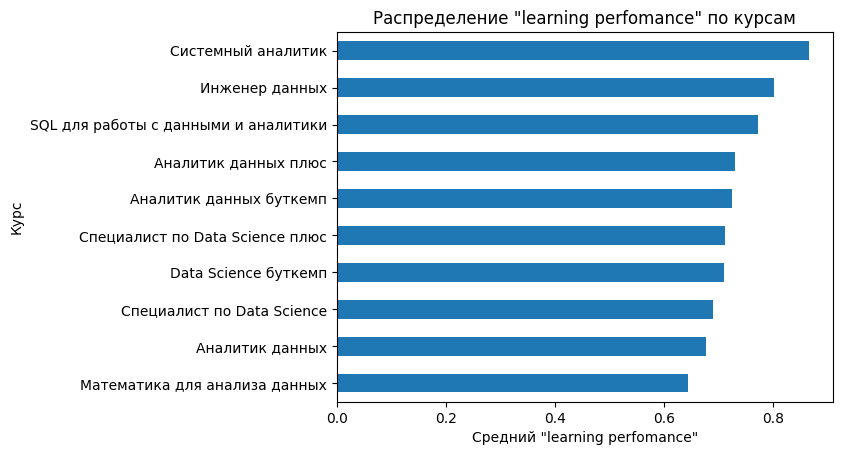

In [ ]:
# и посмотрим на график
df_lp.groupby('profession_name')[['lp_avg']].mean().\
sort_values('lp_avg').plot(kind='barh')
plt.title('Распределение "learning perfomance" по курсам')
plt.xlabel('Средний "learning perfomance"')
plt.ylabel('Курс')
plt.yticks(np.arange(10), ['Математика для анализа данных', 'Аналитик данных', 'Специалист по Data Science',
                           'Data Science буткемп', 'Специалист по Data Science плюс', 'Аналитик данных буткемп', 
                           'Аналитик данных плюс', 'SQL для работы с данными и аналитики', 'Инженер данных', 'Системный аналитик'
                           ])
plt.legend().remove()

Лучшая успеваемость &mdash; на курсе системного анализа. Другие крупные направления находятся в хвосте этого списка, с показателями около 60%. 

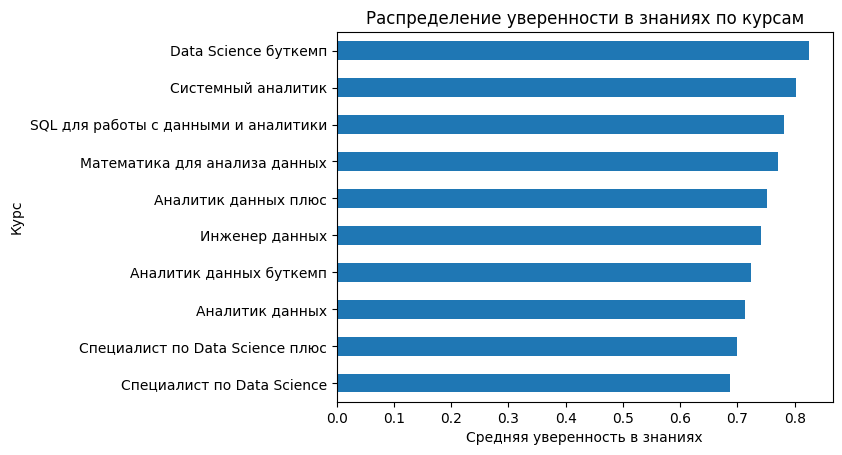

In [ ]:
# график распределение уверенности в знаниях
df_lp.groupby('profession_name')[['scaled_confidence']].mean().\
sort_values('scaled_confidence').plot(kind='barh')
plt.title('Распределение уверенности в знаниях по курсам')
plt.xlabel('Средняя уверенность в знаниях')
plt.ylabel('Курс')
plt.yticks(np.arange(10), ['Специалист по Data Science', 'Специалист по Data Science плюс', 'Аналитик данных',
                           'Аналитик данных буткемп', 'Инженер данных', 'Аналитик данных плюс',
                           'Математика для анализа данных', 'SQL для работы с данными и аналитики', 'Системный аналитик',
                           'Data Science буткемп'])
plt.legend().remove()

Уверенность в знаниях распределяется похожим на успеваемость образом. Вероятно, эти параметры имеют некую зависимость. 

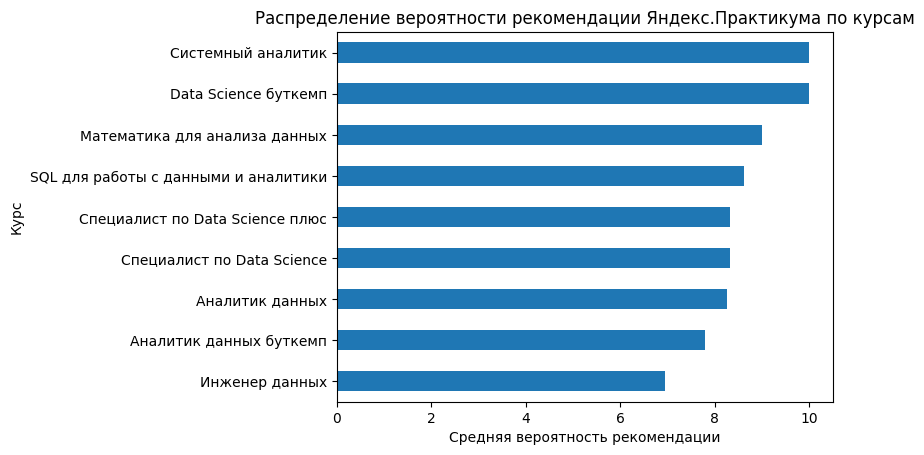

In [ ]:
# график распределения вероятности рекомендации по курсам
df_lp.query('profession_name != "data-analyst-plus"').groupby('profession_name')[['chance_of_recomendation']].mean().\
sort_values('chance_of_recomendation').plot(kind='barh')
plt.title('Распределение вероятности рекомендации Яндекс.Практикума по курсам')
plt.xlabel('Средняя вероятность рекомендации')
plt.ylabel('Курс')
plt.yticks(np.arange(9), ['Инженер данных', 'Аналитик данных буткемп', 'Аналитик данных', 'Специалист по Data Science',
                          'Специалист по Data Science плюс', 'SQL для работы с данными и аналитики',
                          'Математика для анализа данных', 'Data Science буткемп', 'Системный аналитик'])
plt.legend().remove()

Готовы рекомендовать чаще также системные аналитики. 

#### Выводы по показателям успеваемости, уверенности в собственных знаниях и вероятности рекомендации 

Наилучший LP показывают студенты системного анализа, инженеры данных и SQL.   

Меньше всего уверены в своих знаниях аналитики данных и дата саентисты. Самые уверенные &mdash; системные аналитики и участники буткемпа по дата саенс.   

По вероятности рекомендации ЯП наибольший показатель снова у системных аналитиков, дата саентистов, а не готовы рекомендовать ЯП дата инженеры.   

При этом студенты курса "Аналитик данных плюс" совсем не отвечали на вопрос о рекомендации ЯП, поэтому их нет на графике.

Интересно отметить, что при одном из лучших LP дата инженеры не очень уверены в своих знаниях, и не хотят рекомендовать ЯП друзьям. 

## Выявление коррелирующих параметров

In [ ]:
# создаем матрицу корреляций
data_gen[['lp_avg',	'scaled_confidence',	'chance_of_recomendation']].corr()

,lp_avg,scaled_confidence,chance_of_recomendation
lp_avg,1.000000,0.115054,0.047322
scaled_confidence,0.115054,1.000000,0.417659
chance_of_recomendation,0.047322,0.417659,1.000000


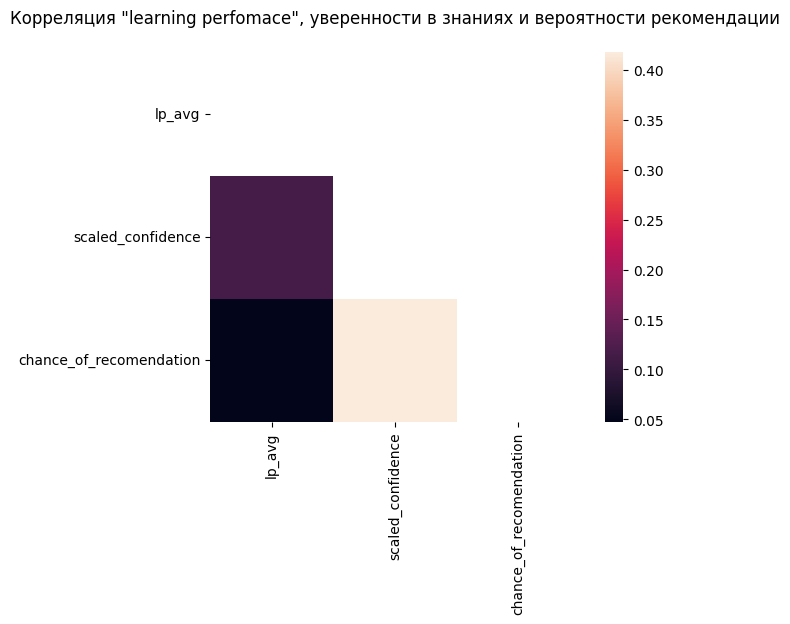

In [ ]:
corr_matrix = data_gen[['lp_avg',	'scaled_confidence',	'chance_of_recomendation']].corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
ax = sns.heatmap(corr_matrix, mask=mask, square=True)

plt.title('Корреляция "learning perfomace", уверенности в знаниях и вероятности рекомендации\n');

Ознакомившись с матрицей корреляций можем сказать, что есть умеренная корреляция между шансом порекомендовать курс и уверенностью в собственных знаниях студента. По остальным параметрам связь слабая. 

## Составление портрета студента

Как мы увидели ранее, основное количество студентов учатся именно на этих трех направлениях, а остальные курсы имеют до 20 студентов. В рамках нашей задачи решили, что нет необходимости рассматривать каждый курс в отдельности, поэтому делим всех студентов на три основных направления. 

Рассмотрим следующие характеристики пользователей:  
- цели обучения;  
- опыт работы в IT;
- сегмент пользователя (b2c, b2g). 

In [ ]:
prof = ['data-analyst', 'data-scie', 'systems-analyst']

# фукнция добавляет маркер направления по курсу студента
def get_prof(row):
    for val in prof:
        if val in row['profession_name']:
            return val
    return None

In [ ]:
# добавляем столбец-маркер профессии
data_gen['profession'] = data_gen.apply(get_prof, axis=1)
data_gen = data_gen.replace('data-scie', 'data-science')

### Распределение студентов по направлениям

In [ ]:
prof_df = (
    data_gen.groupby('profession')[['user_id']]
    .nunique().sort_values('user_id').reset_index()
)

In [ ]:
rus_prof = ["Системный аналитик", "Специалист по Data Science", "Аналитик данных"]

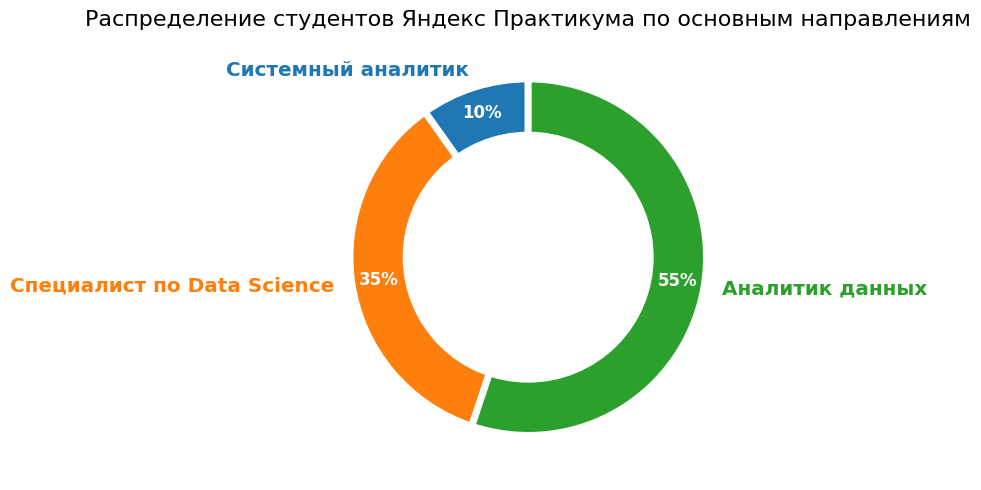

In [ ]:
# график распределения студентов по направлениям
fig, ax = plt.subplots(figsize=(10,5))

patches, texts, pcts = ax.pie(
    prof_df['user_id'], labels=rus_prof, autopct='%.0f%%',
    wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'}, pctdistance=.85, 
    startangle=90)


my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold', fontsize=12)
plt.setp(texts, fontweight=600)
ax.set_title('Распределение студентов Яндекс Практикума по основным направлениям', fontsize=16)
plt.tight_layout()

plt.show()

Студенты делятся по направлениям неравномерно: больше половины учится на Аналитика данных - 55%, 35% - на курсах по Data Science, оставшиеся 10% - Системные аналитики.  

Рассмотрим показатели студентов по этим направлениям, сравних их бок о бок. Попробуем выявить основные моменты, которые отличают их друг от друга. 

In [ ]:
# собираем датасеты по каждому направлению
da_students = data_gen[data_gen['profession']=='data-analyst']

ds_students = data_gen[data_gen['profession']=='data-science']

sa_students = data_gen[data_gen['profession']=='systems-analyst']

Собрали датасеты по трем группам. 

### Сравнение ответов на вопросы по студентам различных направлений

In [ ]:
def heat_map_questions():
    '''
    Функция для создания хитмапов по ответам студентов на вопросы. 
    Она создает датасеты, сегментированные по направлению обучения и вопросу, 
    склеивает их в один и строит по нему хитмап. 
    '''
    for i in range(len(radio_alias)):
        matching = [s for s in list(sa_students.columns) if radio_alias[i] in s]
        sa_hm = sa_students[matching].T
        sa_hm.loc[:,'Total'] = sa_hm.sum(axis=1)
        sa_hm = sa_hm[['Total']]
        sa_hm.columns = ['answers']
        sa_hm['answers'] = sa_hm['answers'].astype('int')
        sa_hm = sa_hm.sort_values('answers')
        sa_hm['ratio'] = round(sa_hm['answers']/sa_hm['answers'].sum(), 2)

        matching = [s for s in list(da_students.columns) if radio_alias[i] in s]
        da_hm = da_students[matching].T
        da_hm.loc[:,'Total'] = da_hm.sum(axis=1)
        da_hm = da_hm[['Total']]
        da_hm.columns = ['answers']
        da_hm['answers'] = da_hm['answers'].astype('int')
        da_hm = da_hm.sort_values('answers')
        da_hm['ratio'] = round(da_hm['answers']/da_hm['answers'].sum(), 2)

        matching = [s for s in list(ds_students.columns) if radio_alias[i] in s]
        ds_hm = ds_students[matching].T
        ds_hm.loc[:,'Total'] = ds_hm.sum(axis=1)
        ds_hm = ds_hm[['Total']]
        ds_hm.columns = ['answers']
        ds_hm['answers'] = ds_hm['answers'].astype('int')
        ds_hm = ds_hm.sort_values('answers')
        ds_hm['ratio'] = round(ds_hm['answers']/ds_hm['answers'].sum(), 2)

        df_hm = da_hm[['ratio']].join(sa_hm['ratio'], lsuffix='_da', rsuffix='_sa').join(ds_hm['ratio'], lsuffix='_ds').reset_index()

        df_hm['index'] = df_hm['index'].str.split('_').apply(lambda x: x[1])
        df_hm = df_hm.rename(columns={'ratio_da':'Аналитик данных', 'ratio_sa':'Системный аналитик', 'ratio':'Специалист по DS'})

        df_hm = df_hm.set_index('index')

        plt.figure(figsize=(8, 7.5))
        sns.heatmap(data=df_hm.sort_values('Аналитик данных', ascending=False), linewidths=0.5,
                    annot=True, fmt='.0%')
        plt.title(f'Ответы на вопрос \"{radio_alias[i]}\"\n')
        plt.xlabel('Направление')
        plt.ylabel(None)
        plt.yticks(rotation=0)
        plt.show();

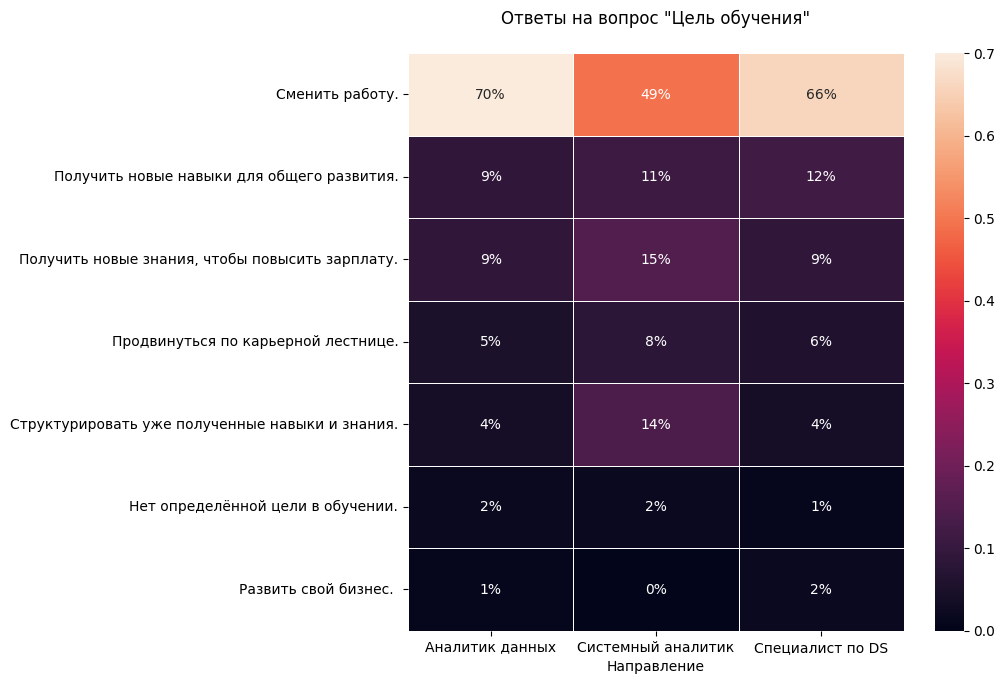

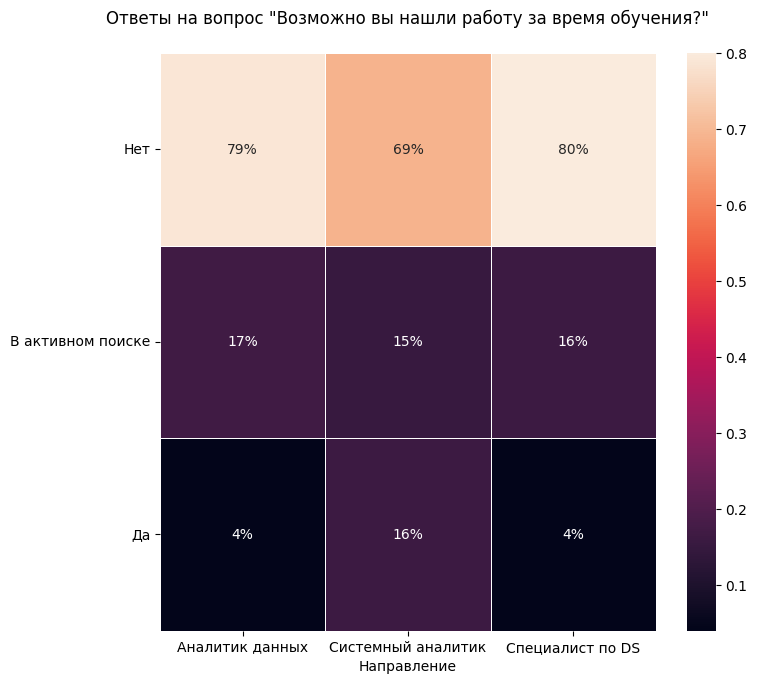

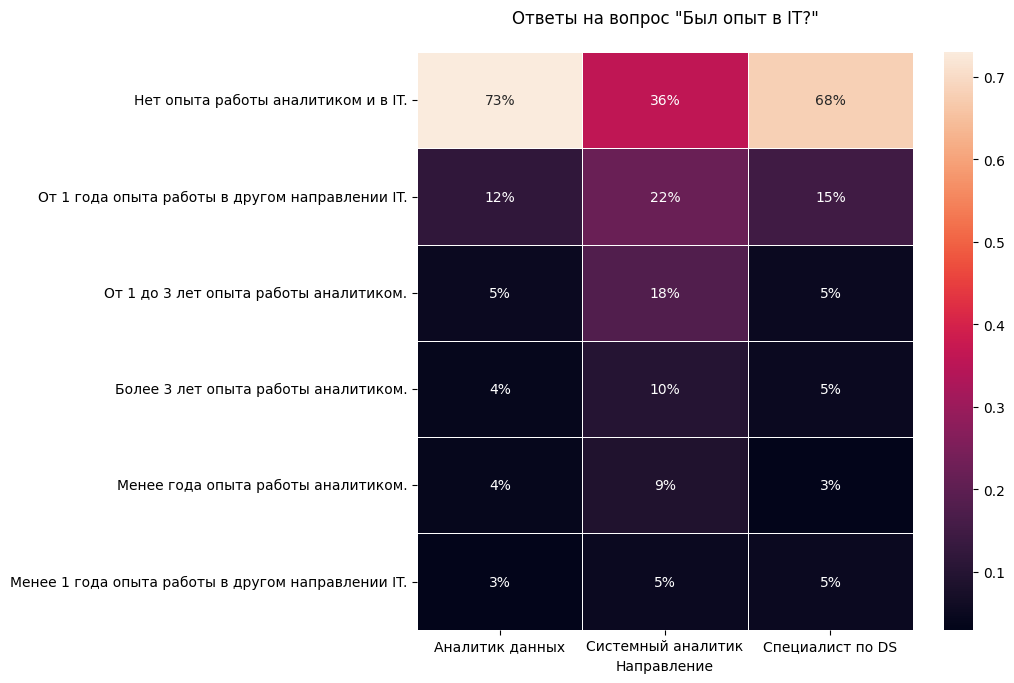

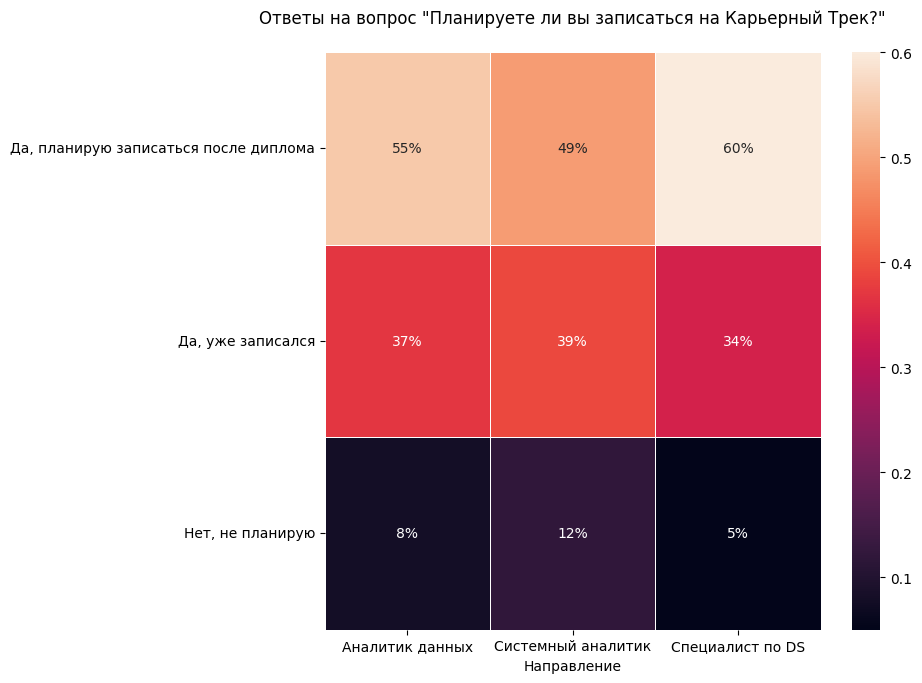

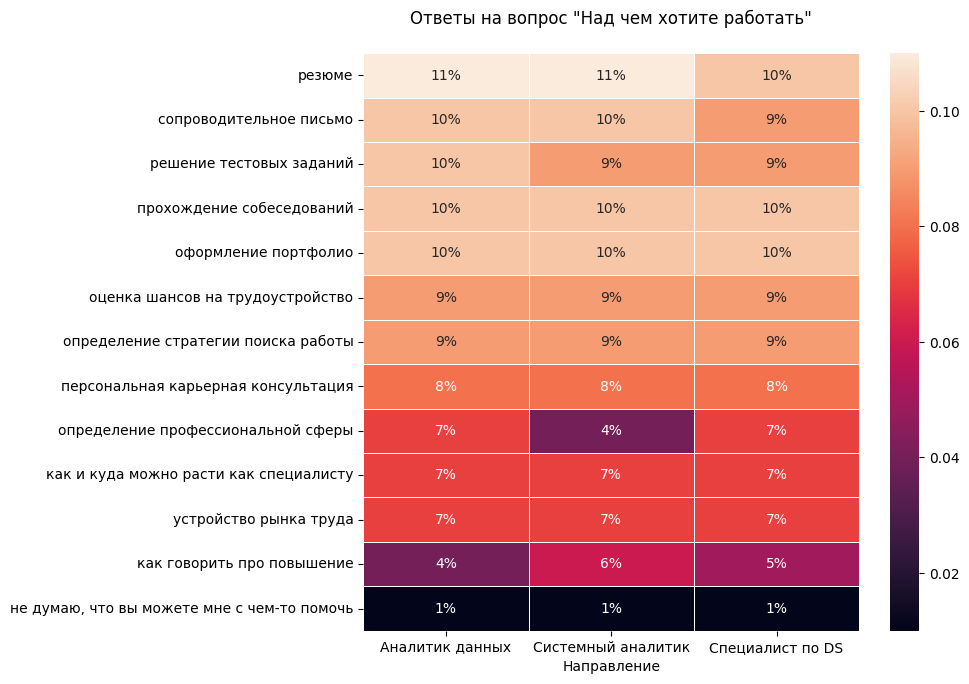

In [ ]:
heat_map_questions()

#### Выводы по ответам на вопросы

По ответам на вопросы студентов можем сделать следующие выводы:  
- Группы DA и DS между собой очень похожи. Это люди без опыта (73% и 68% соответственно). На курсе по Системному анализу в это же время только 36% студентов не имеют опыта в айти. Остальные либо с релевантным опытом работы, либо с опытом в смежной сфере айти.  
- Учатся, чтобы сменить работу, 70% и 66% на DA и DS соответственно, и только 49% на SA. У студентов системного анализа многие учатся для повышения зарплаты и структурирования имеющихся знаний.  
- Среди пунктов, над которыми студенты хотят работать в рамках карьерного трека, системные аналитика чаще других выбирают разговоры про повышение, в то же время их меньше интересует определение профессиональной сферы. 

Взглянем подробнее, как распределяются доли наиболее частых ответов на вопросы по нашим направлениям. 

In [ ]:
# сделаем пустые датафреймы, чтобы наполнить их данными для построения графиков
answ_da = pd.DataFrame({'question':[1], 'answers':[1], 'ratio':[1]})
answ_sa = pd.DataFrame({'question':[1], 'answers':[1], 'ratio':[1]})
answ_ds = pd.DataFrame({'question':[1], 'answers':[1], 'ratio':[1]})

In [ ]:
# заполняем созданные датасеты строками по самым частым ответам по каждому направлению
for i, v in enumerate(radio_alias[:3]):
    matching = [s for s in list(da_students.columns) if radio_alias[i] in s]
    da_df = da_students[matching].T
    da_df.loc[:,'Total'] = da_df.sum(axis=1)
    da_df = da_df[['Total']].reset_index()
    da_df.columns = ['question', 'answers']
    da_df['answers'] = da_df['answers'].astype('int')
    da_df = da_df.sort_values('answers')
    da_df['ratio'] = round(da_df['answers']/da_df['answers'].sum(), 2)
    answ_da.loc[len(answ_da.index)] = da_df.iloc[-1] 

for i, v in enumerate(radio_alias[:3]):
    matching = [s for s in list(sa_students.columns) if radio_alias[i] in s]
    sa_df = sa_students[matching].T
    sa_df.loc[:,'Total'] = sa_df.sum(axis=1)
    sa_df = sa_df[['Total']].reset_index()
    sa_df.columns = ['question', 'answers']
    sa_df['answers'] = sa_df['answers'].astype('int')
    sa_df = sa_df.sort_values('answers')
    sa_df['ratio'] = round(sa_df['answers']/sa_df['answers'].sum(), 2)
    answ_sa.loc[len(answ_sa.index)] = sa_df.iloc[-1]

for i, v in enumerate(radio_alias[:3]):
    matching = [s for s in list(ds_students.columns) if radio_alias[i] in s]
    ds_df = ds_students[matching].T
    ds_df.loc[:,'Total'] = ds_df.sum(axis=1)
    ds_df = ds_df[['Total']].reset_index()
    ds_df.columns = ['question', 'answers']
    ds_df['answers'] = ds_df['answers'].astype('int')
    ds_df = ds_df.sort_values('answers')
    ds_df['ratio'] = round(ds_df['answers']/ds_df['answers'].sum(), 2)
    answ_ds.loc[len(answ_ds.index)] = ds_df.iloc[-1]

In [ ]:
radio_alias[:3]

['Цель обучения',
 'Возможно вы нашли работу за время обучения?',
 'Был опыт в IT?']

In [ ]:
answ_da = answ_da.drop(index=0, axis=0).reset_index(drop=True)
answ_da['Направление'] = 'Аналитик данных'

answ_sa = answ_sa.drop(index=0, axis=0).reset_index(drop=True)
answ_sa['Направление'] = 'Системный аналитик'

answ_ds = answ_ds.drop(index=0, axis=0).reset_index(drop=True)
answ_ds['Направление'] = 'Специалист по Data Science'

In [ ]:
# объединяем в одну таблицу
answ_df = pd.concat(
    [
    answ_da[['question', 'ratio', 'Направление']],
    answ_sa[['question', 'ratio', 'Направление']],
    answ_ds[['question', 'ratio', 'Направление']]
    ],
    axis=0
)

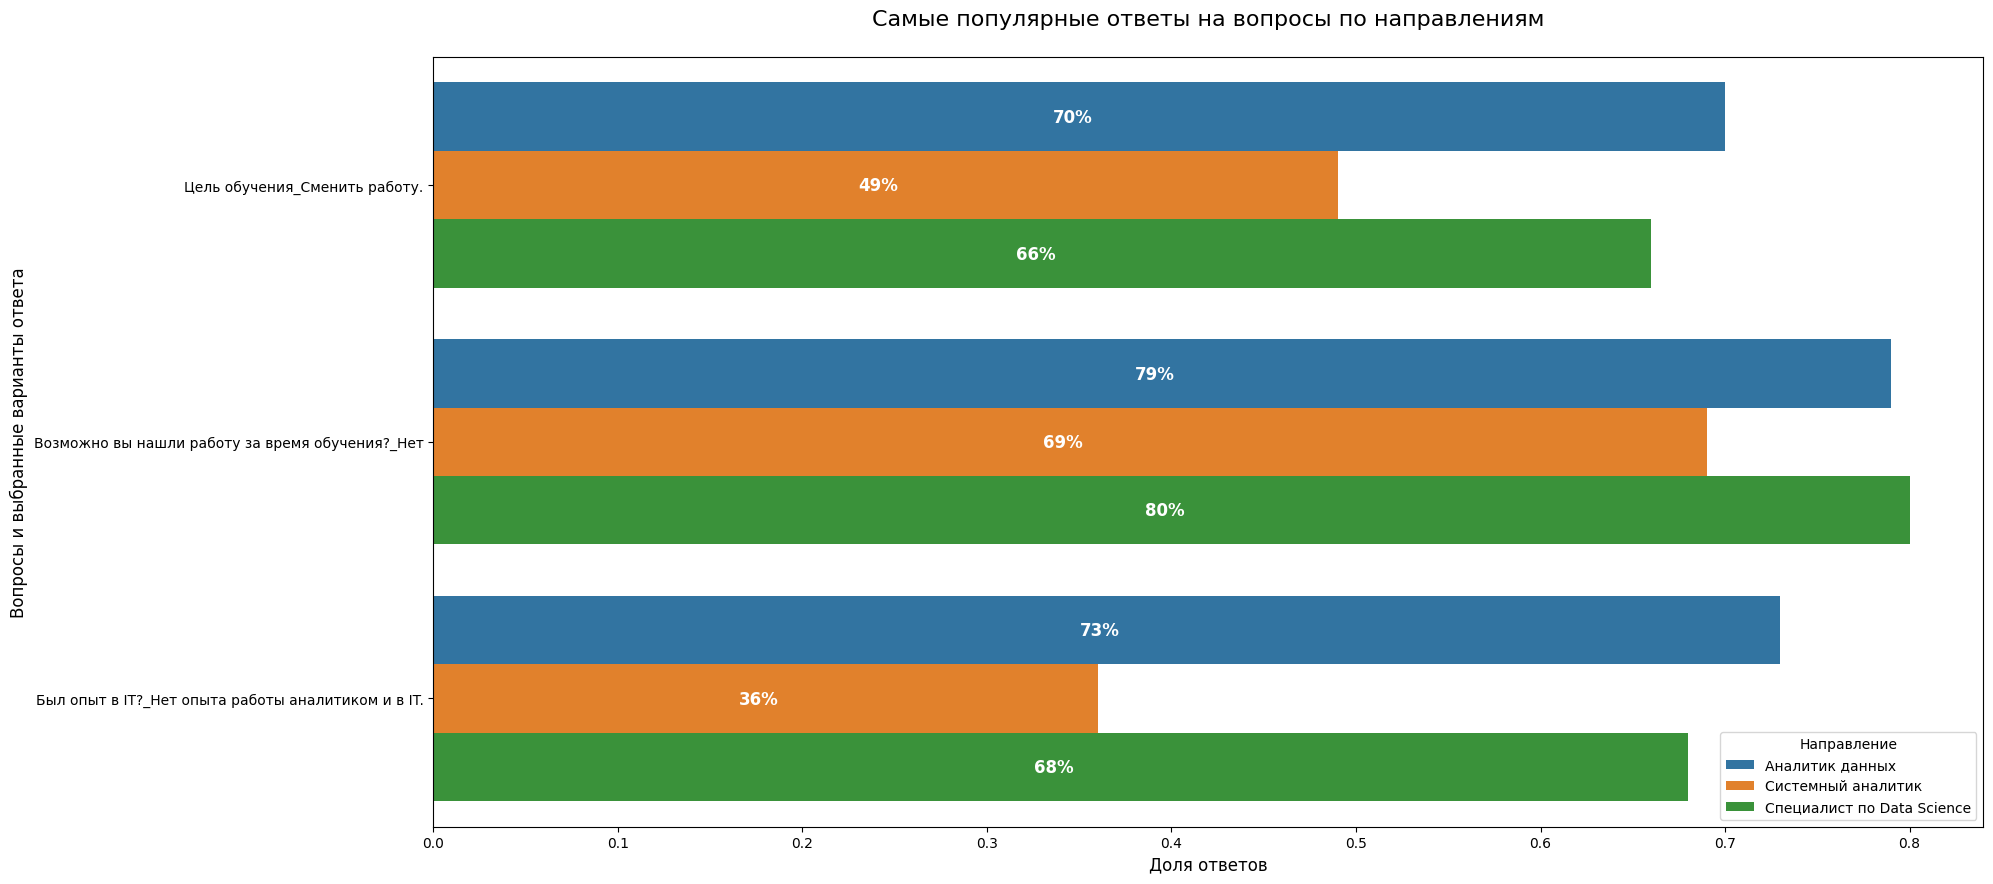

In [ ]:
# и строим график
plt.figure(figsize=(20, 10))

plots = sns.barplot(data=answ_df, x='ratio', y='question', hue='Направление')
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0%'),
                  ((bar.get_x() + bar.get_width()/2),
                  bar.get_y()), ha='center', va='center',
                  size=12, xytext=(-5, -25),
                  textcoords='offset points', color='white', fontweight='bold')
    
plt.title('Самые популярные ответы на вопросы по направлениям\n', fontsize=16)
plt.xlabel("Доля ответов", fontsize=12)
plt.ylabel("Вопросы и выбранные варианты ответа", fontsize=12);

Что мы видим на этой визуализации: мы видим, как отличаются системные аналитики от остальных направлений.  
- Они реже учатся для смены работы;  
- Тем не менее чаще находят работу за время обучения;  
- И заметно чаще имеют опыт работы в айти. 

### Сравнение индекса успеваемости и уверенности в своих знаниях по направлениям

Сравним уровни успеваемости и уверенности в знаниях. Для этого построим график, на котором отобразим оба этих показателя. 

In [ ]:
# собираем датасет для построения графика
df_bar_conf = data_gen[['profession', 'lp_avg', 'scaled_confidence']]

test_plot = df_bar_conf.groupby('profession').agg({'lp_avg':'mean', 'scaled_confidence':'mean'}).T.reset_index()

In [ ]:
# формируем данные по каждому направлению в отдельности
da_test = test_plot[['index', 'data-analyst']].copy()
da_test['Направление'] = 'Аналитик данных'
da_test = da_test.rename(columns={'data-analyst':'val'})

sa_test = test_plot[['index', 'systems-analyst']].copy()
sa_test['Направление'] = 'Системный аналитик'
sa_test = sa_test.rename(columns={'systems-analyst':'val'})

ds_test = test_plot[['index', 'data-science']].copy()
ds_test['Направление'] = 'Специалист по Data Science'
ds_test = ds_test.rename(columns={'data-science':'val'})

In [ ]:
# объединаяем, создавая таблицу с удобным порядком столбцов
plot_df = pd.concat(
    [
    da_test[['Направление', 'val', 'index']],
    sa_test[['Направление', 'val', 'index']],
    ds_test[['Направление', 'val', 'index']]
    ],
    axis = 0
)

# округляем дроби
plot_df['val'] = round(plot_df['val'], 2)

# переводим значения на русский для отображения на графике
plot_df = plot_df.replace('lp_avg', 'Индекс успеваемости').replace('scaled_confidence', 'Уверенность в собственных знаниях')

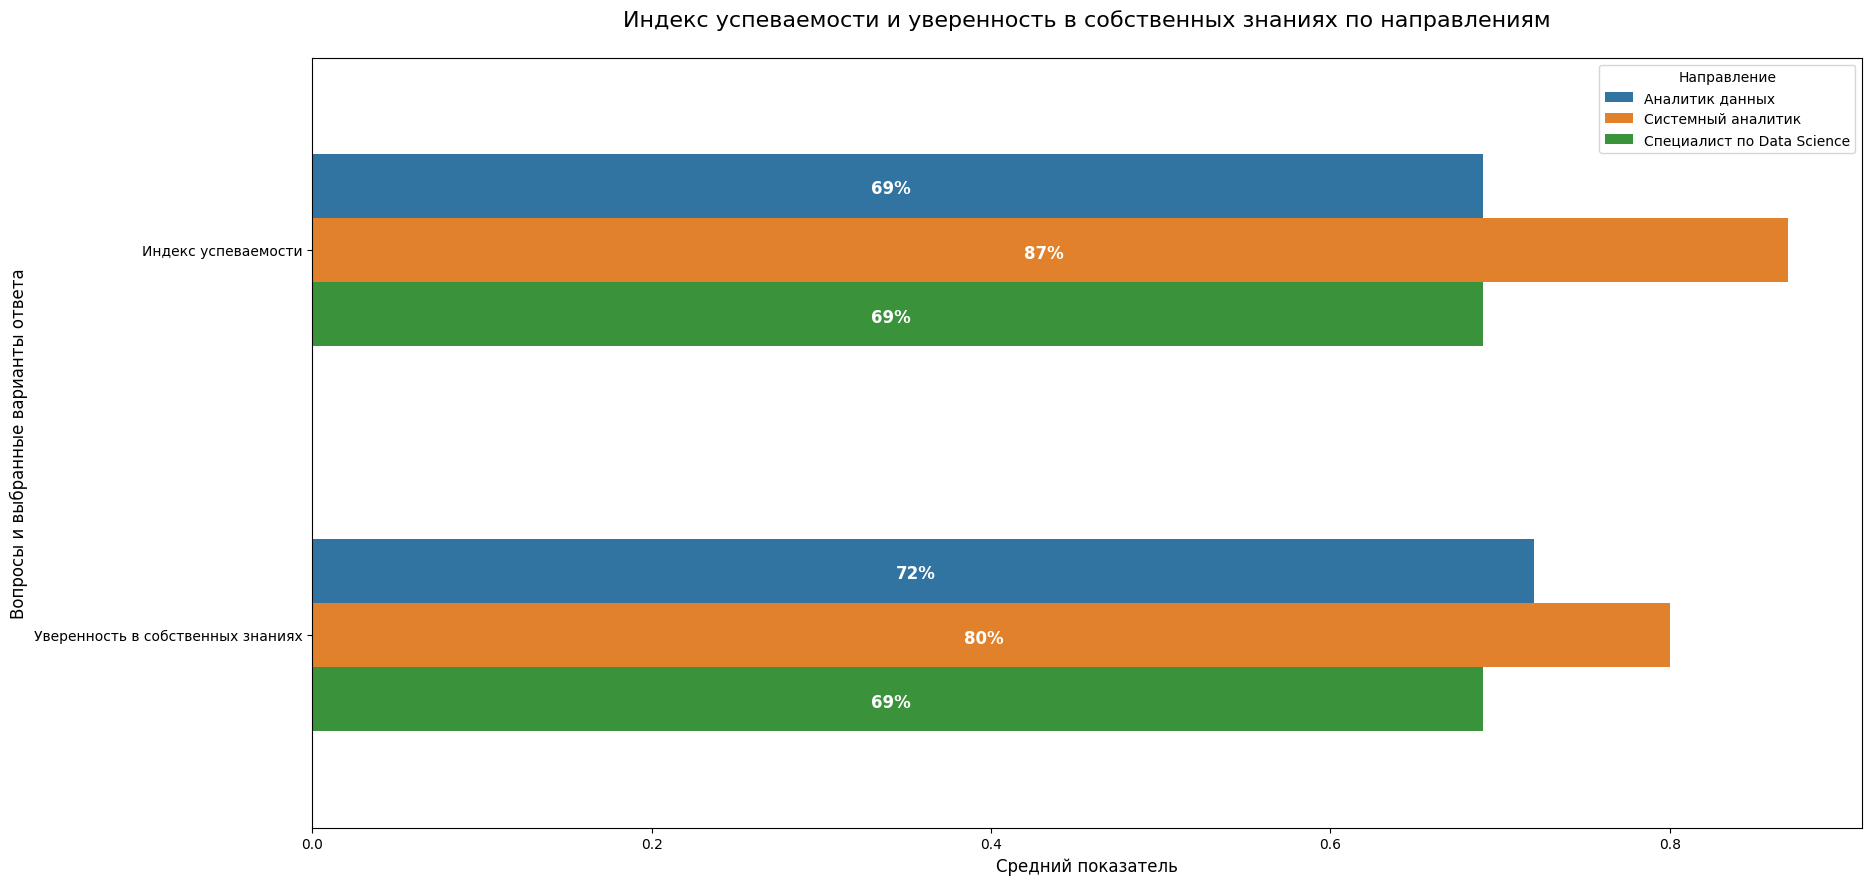

In [ ]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(data=plot_df, x='val', y='index', hue='Направление', width=.5)
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0%'),
                  ((bar.get_x() + bar.get_width()/2),
                  bar.get_y()), ha='center', va='center',
                  size=12, xytext=(-5, -25),
                  textcoords='offset points', color='white', fontweight='bold')
    
plt.title('Индекс успеваемости и уверенность в собственных знаниях по направлениям\n', fontsize=16)
plt.xlabel("Средний показатель", fontsize=12)
plt.ylabel("Вопросы и выбранные варианты ответа", fontsize=12);

#### Выводы по успеваемости и уверенности в знаниях

По успеваемости и уверенности среди трех испытуемых лидируют (опять) системные аналитики. С большой вероятностью это от того, что большинство студентов с опытом работы.  

Интересная особенность по DS направлению. Несмотря на то, что успеваемость у них одинаковая с DA, студенты дата саенс чаще чувствуют неуверенность в знаниях. 

### Распределение по источникам оплаты

In [ ]:
# считаем количество и доли от числа студентов, которые были в академе
df_segment = data_gen.groupby(['profession', 'current_segment'])[['user_id']].nunique().reset_index()
df_segment['sum'] = df_segment.groupby('profession')[['user_id']].transform('sum')
df_segment['ratio'] = df_segment['user_id']/df_segment['sum']

In [ ]:
# для графика переводим название колонки и профессий на русский
df_segment = df_segment.rename(columns={'current_segment':'Источник оплаты'})

df_segment = df_segment.replace('data-analyst', 'Аналитик данных').replace('data-science', "Специалист по DS")\
                       .replace('systems-analyst', 'Системный аналитик')

In [ ]:
# переводим на русский сегменты
df_segment = df_segment.replace('data-analyst', 'Аналитик данных').replace('data-science', "Специалист по DS")\
                       .replace('systems-analyst', 'Системный аналитик')

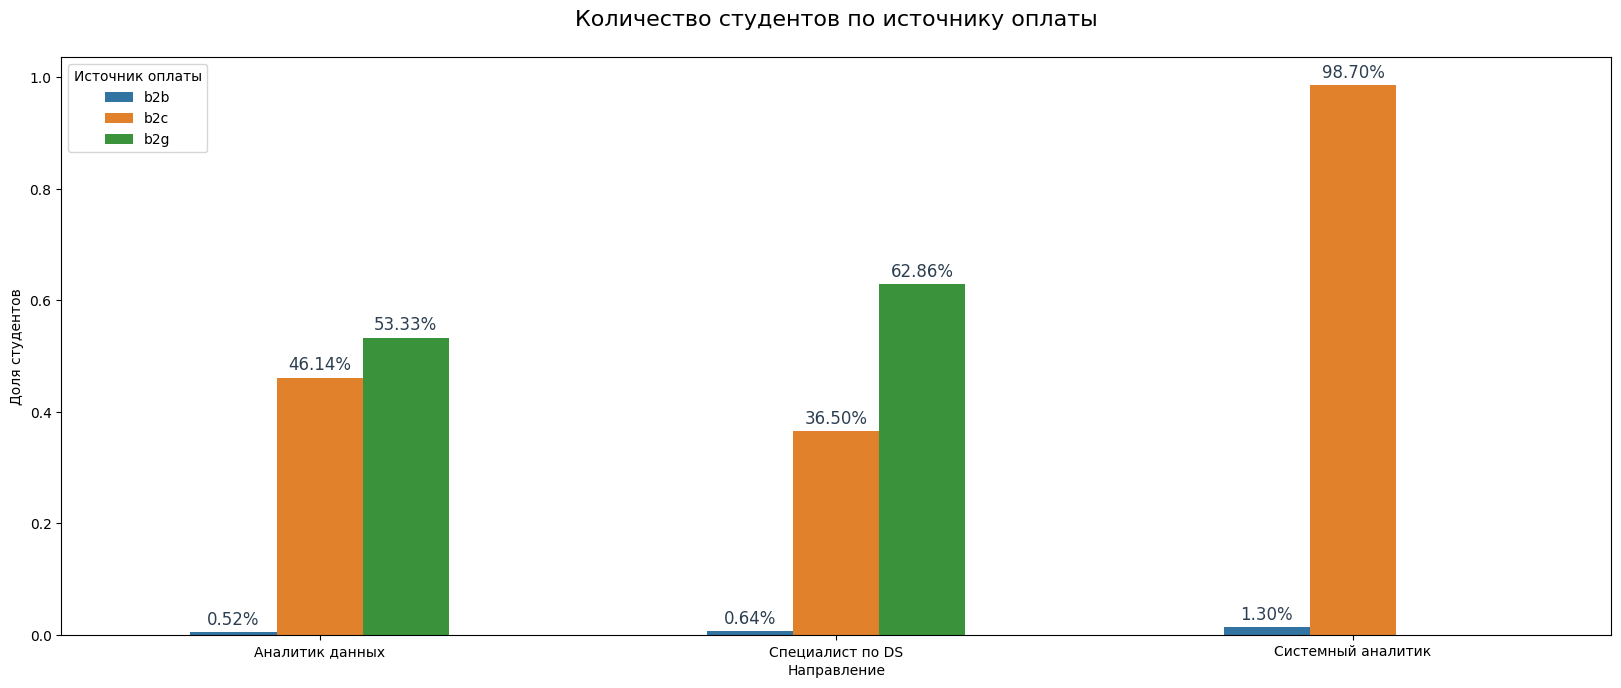

In [ ]:
plt.figure(figsize=(20,7.5))
plt.title('Количество студентов по источнику оплаты\n', fontsize=16)

plots = sns.barplot(data=df_segment, 
            x='profession', y='ratio', hue='Источник оплаты', width=.5)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2%'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(0,9),
                  textcoords='offset points', color='#2c3e50')
plt.xlabel('Направление')
plt.ylabel('Доля студентов')
plt.show()

#### Вывод по источникам оплаты

Как мы отметили в начале анализа, немного более половины студентов пришли по программам от государства, они в сегменте b2g. Еще около 50% оплачивали сами, b2c. Меньше всего студентов пришли от работодателей.  

В разрезе курсов видим, что по направлению DA разделение практически равное между b2c и b2g. На курсах DS b2g почти в 2 раза больше, чем b2c. А курс системной аналитики практически все студенты оплачивают самостоятельно (98.7%). 

### Кто ходил в академический отпуск

In [ ]:
# подсчитываем количество студентов, поменявших когорту

academ = (data_gen['cohort'] != data_gen['current_cohort']).sum()
print(f"Количество студентов, поменявших когорту: {academ}")

Количество студентов, поменявших когорту: 215


In [ ]:
# запишем информацию о студентах, уходивших в академ в столбец academ
data_gen['academ'] = data_gen['cohort'] != data_gen['current_cohort']

In [ ]:
data_gen['academ'].mean()

0.06834075015893197

Всего 7% студентов уходили в академ

Далее сделаем срез и рассмотрим только студентов, которые брали академичесткий отпуск

##### Доля академов по направлениям

In [ ]:
# фильтруем датасет
academ = data_gen[data_gen['academ'] == True]

In [ ]:
academ.head(3)

,user_id,cohort,current_cohort,current_segment,original_segment,profession_name,Был опыт в IT?_Более 3 лет опыта работы аналитиком.,Был опыт в IT?_Менее 1 года опыта работы в другом направлении IT.,Был опыт в IT?_Менее года опыта работы аналитиком.,Был опыт в IT?_Нет опыта работы аналитиком и в IT.,Был опыт в IT?_От 1 года опыта работы в другом направлении IT.,Был опыт в IT?_От 1 до 3 лет опыта работы аналитиком.,Возможно вы нашли работу за время обучения?_В активном поиске,Возможно вы нашли работу за время обучения?_Да,Возможно вы нашли работу за время обучения?_Нет,Над чем хотите работать_как говорить про повышение,Над чем хотите работать_как и куда можно расти как специалисту,"Над чем хотите работать_не думаю, что вы можете мне с чем-то помочь",Над чем хотите работать_определение профессиональной сферы,Над чем хотите работать_определение стратегии поиска работы,Над чем хотите работать_оформление портфолио,Над чем хотите работать_оценка шансов на трудоустройство,Над чем хотите работать_персональная карьерная консультация,Над чем хотите работать_прохождение собеседований,Над чем хотите работать_резюме,Над чем хотите работать_решение тестовых заданий,Над чем хотите работать_сопроводительное письмо,Над чем хотите работать_устройство рынка труда,"Планируете ли вы записаться на Карьерный Трек?_Да, планирую записаться после диплома","Планируете ли вы записаться на Карьерный Трек?_Да, уже записался","Планируете ли вы записаться на Карьерный Трек?_Нет, не планирую",Цель обучения_Нет определённой цели в обучении.,"Цель обучения_Получить новые знания, чтобы повысить зарплату.",Цель обучения_Получить новые навыки для общего развития.,Цель обучения_Продвинуться по карьерной лестнице.,Цель обучения_Развить свой бизнес.,Цель обучения_Сменить работу.,Цель обучения_Структурировать уже полученные навыки и знания.,lp_avg,confidence,chance_of_recomendation,scaled_confidence,profession,academ
1,5415,data_cohort_117,data_cohort_119,b2g,b2g,data-analyst,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.85,0.000000,NaN,0.500000,data-analyst,True
59,99012,data_cohort_119,data_cohort_121,b2g,b2g,data-analyst,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.83,0.666667,NaN,0.666667,data-analyst,True
101,194340,ds_cohort_107,ds_cohort_109,b2g,b2g,data-scientist,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.79,0.250000,NaN,0.562500,data-science,True


In [ ]:
# Создаем DataFrame из academ
df = pd.DataFrame(data_gen.groupby('profession').agg({'academ':'mean'}).sort_values('academ', ascending=False).reset_index())

df = df.replace('data-analyst', 'Аналитик данных').replace('data-science', "Специалист по DS")\
                       .replace('systems-analyst', 'Системный аналитик')

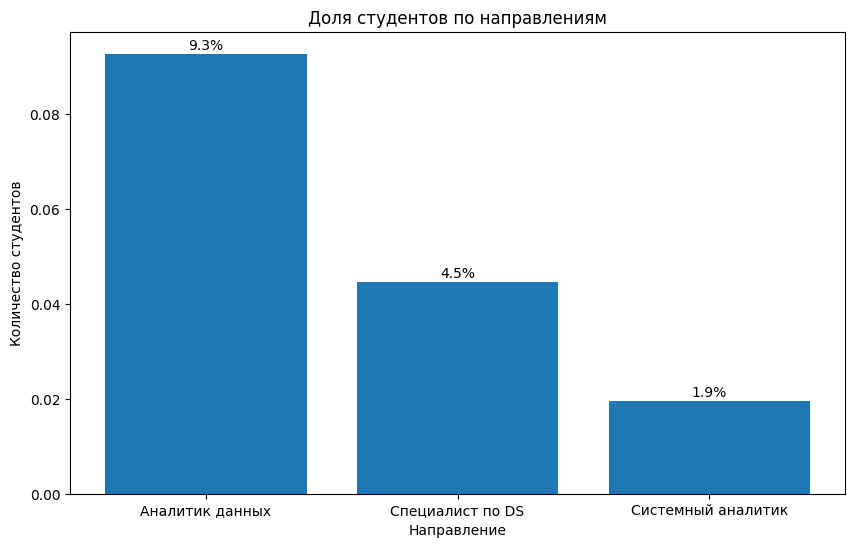

In [ ]:
# Создаем график
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df['profession'], df['academ'])
ax.set(title='Доля студентов по направлениям', xlabel='Направление', ylabel='Количество студентов')
plt.tick_params(axis='x', rotation=0)

# Добавляем текстовые аннотации
for i, acdm in enumerate(df.academ):
    ax.text(i, acdm+.001, '{:.1%}'.format(acdm), horizontalalignment='center')


plt.show()

- процент студентов направления анализа данных, уходившие в академ: 9.3%
- процент студентов направления data science, уходившие в академ: 4.5%
- процент системных аналитиков, уходившие в академ: 1.9%

##### Доля академов по источникам оплаты

In [ ]:
# агрегируем данные
grouped = academ.groupby('current_segment').agg({'user_id': 'nunique'})
grouped = grouped.sort_values('user_id', ascending=False).reset_index()
grouped = grouped.merge(data_gen.groupby('current_segment')[['user_id']].nunique().reset_index(), on='current_segment')

In [ ]:
# считаем долю вышедших в академ от всех студентов сегмента
grouped['ratio'] = grouped['user_id_x']/grouped['user_id_y']

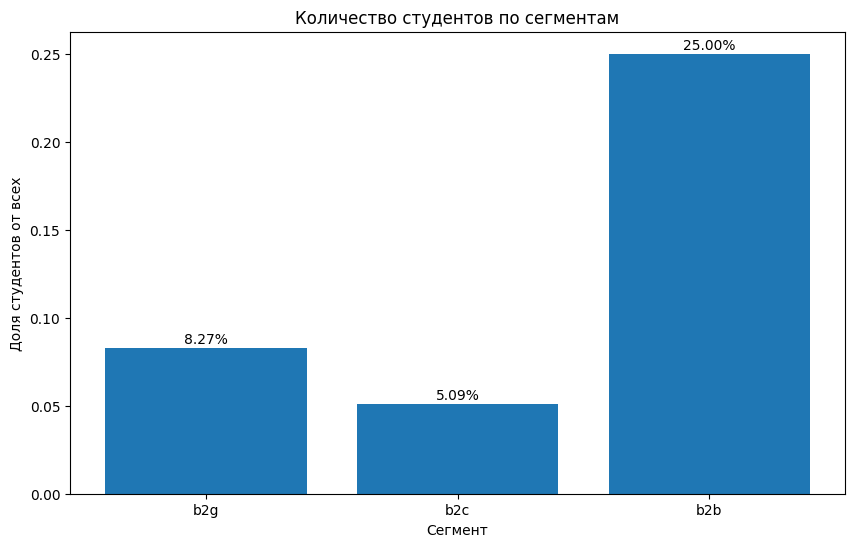

In [ ]:
# создаем график
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(grouped['current_segment'], grouped['ratio'])
ax.set_title('Количество студентов по сегментам')
ax.set_xlabel('Сегмент')
ax.set_ylabel('Доля студентов от всех')

# добавляем текст над столбцами
for i, val in enumerate(grouped['ratio']):
    ax.text(i, val+0.001, '{:.2%}'.format(val), ha='center', va='bottom')

plt.show()

**Вывод:**

Среди всех сегментов больше всего академов берут студенты b2b. Это может быть связано с текущей занятостью на работе. Студенты b2g и b2c в отпуск ходят реже, 8% и 5% соответственно от всех студентов указанного сегмента.  

Получается, те, кто сам платит за обучение, чаще проходят курс без перерывов. 

Посмотрим как отличается уровень уверенности в собственных знаниях студентов, которые брали и не брали академический отпуск

In [ ]:
# создаем датасет с данными
DF = pd.concat(
    [academ[['scaled_confidence', 'academ']],
    data_gen[data_gen['academ']==False][['scaled_confidence', 'academ']]],
    axis=0
)

DF['academ'] = DF['academ'].apply(lambda x: 'Был в отпуске' if x==True else 'Не брал отпуск')
DF = DF.rename(columns={'academ':'Академический отпуск'})

In [ ]:
# добавим в таблицу индикатор, чтобы можно было использовать
# параметр hue
DF['indicator'] = 1

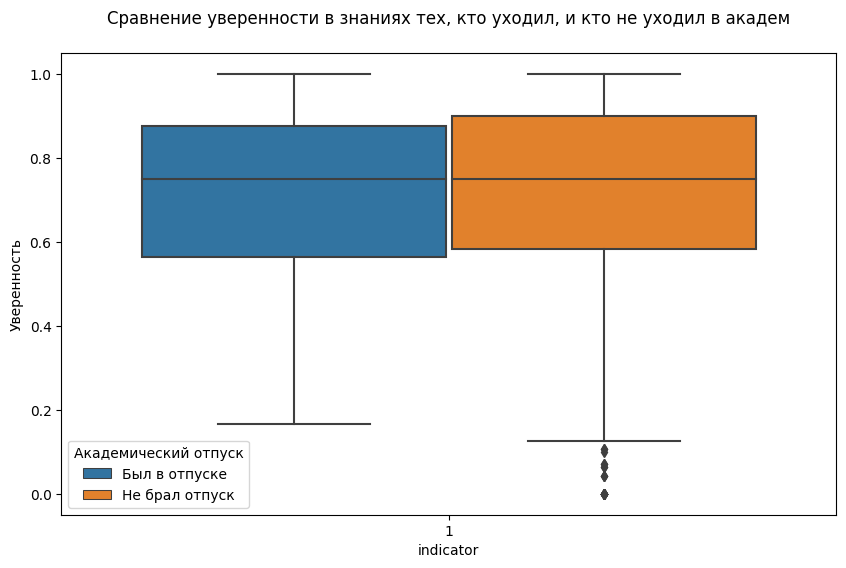

In [ ]:
# построим боксплот

plt.figure(figsize=(10,6))

sns.boxplot(data=DF, y='scaled_confidence', x='indicator', hue='Академический отпуск')

plt.title('Сравнение уверенности в знаниях тех, кто уходил, и кто не уходил в академ\n')
plt.ylabel('Уверенность')
plt.show()

**Вывод:**

Уверенность в собственных знаниях среди студентов, которые брали академический отпуск (по всему датасету) практически не отличается от тех, кто не делал перерыва. 


Укрупним группы и сравним уверенность в знаниях среди бравших и не бравших академ с разбивкой по профессиям

In [ ]:
# соберем датафрейм и заменим bool значения на маркеры академа
academ_df = data_gen[['user_id', 'profession', 'scaled_confidence', 'lp_avg', 'academ', 'current_segment']].copy()
academ_df['academ'] = academ_df['academ'].apply(lambda x: 'Был в отпуске' if x==True else 'Не брал отпуск')
academ_df = academ_df.rename(columns={'academ':'Академический отпуск'})

In [ ]:
academ_df = academ_df.replace('data-analyst', 'Аналитик данных').replace('data-science', "Специалист по DS")\
                     .replace('systems-analyst', 'Системный аналитик')

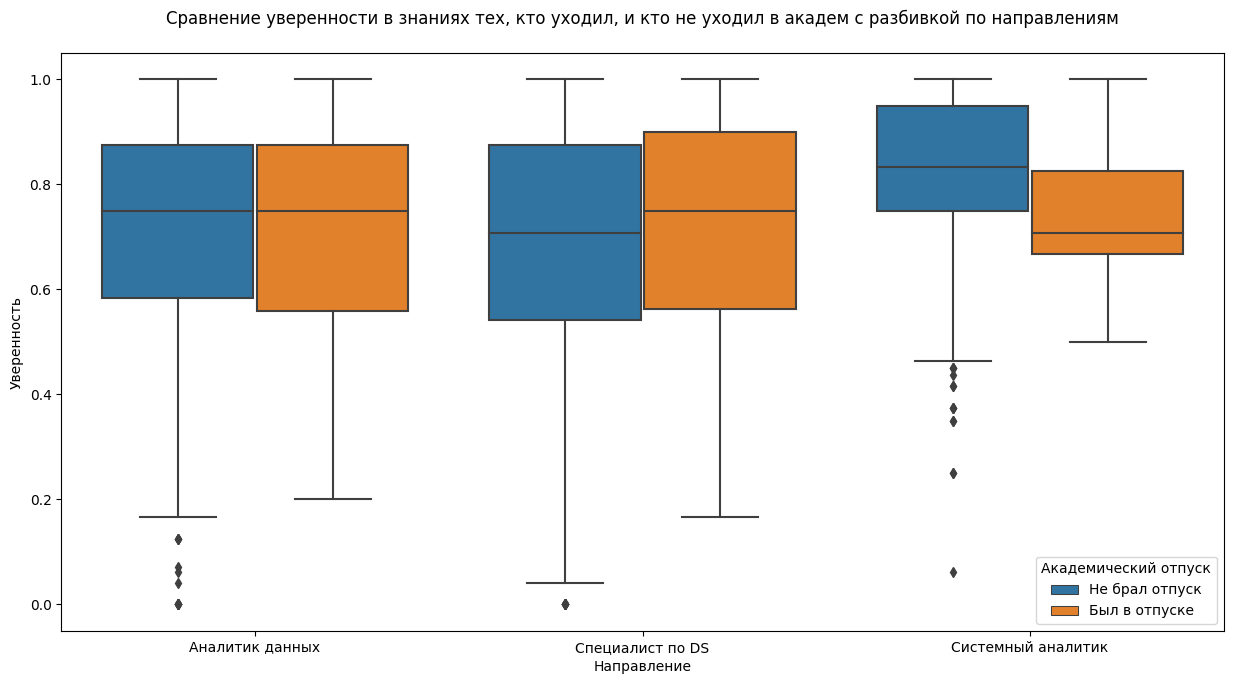

In [ ]:
plt.figure(figsize=(15,7.5))

sns.boxplot(y = 'scaled_confidence', x='profession', hue='Академический отпуск', data = academ_df)

plt.title('Сравнение уверенности в знаниях тех, кто уходил, и кто не уходил в академ с разбивкой по направлениям\n')
plt.xlabel('Направление')
plt.ylabel('Уверенность')
plt.show()

**Вывод:**

Только у системных аналитиков прослеживается заметные различия в уровне уверенности в своих знаниях. У тех, кто в отпуске не был, уверенность в знаниях выше, чем у бравших академ.  

У дата саенс ситуация обратная. Уверены в знаниях больше те, кто был в академе, но сами различия гораздо меньше, чем у системных аналитиков. Возможно, за время отпуска студенты догоняют недостающие темы, и более подготовленными возвращаются в учебный процесс.  

По DA без изменений. 

### Вывод по портретам студента

Итак, получаем портреты студента.  

__DA и DS.__   

Эти направления очень похожи.  
Типичный студент: человек без опыта в айти, который хочет сменить работу. Он имеет успеваемость около 70% и уверен в своих знаниях примерно на те же 70%. Более половины пользователей этих направлений учатся по программам от государства.  

__SA__  

Типичный студент направления Системного анализа имеет опыт работы в аналитике или другой сфере айти, имеет более высокую успеваемость и уверенность в знаниях, чем студенты DA и DS. Практически все студенты этого направления оплачивают курс самостоятельно. 

# Студенты, нашедшие работу во время обучения

In [ ]:
data_gen.groupby('profession').agg({'Возможно вы нашли работу за время обучения?_Да':'mean'})

,Возможно вы нашли работу за время обучения?_Да
profession,
data-analyst,0.042319
data-science,0.041971
systems-analyst,0.159091


Около 4% студентов направлений аналитики данных и Data Sсience нашли работу во время обучения. Студенты системного анализа находили работу во время обучения чаще - почти в 16% случаев.

In [ ]:
for i, v in enumerate(radio_alias):
  matching = [s for s in list(data_gen[data_gen['Возможно вы нашли работу за время обучения?_Да'] == 1].columns) if radio_alias[i] in s]
  fw_df = data_gen[data_gen['Возможно вы нашли работу за время обучения?_Да'] == 1][matching].T
  fw_df.loc[:,'Total'] = fw_df.sum(axis=1)
  fw_df = fw_df[['Total']]
  fw_df.columns = ['answers']
  fw_df['answers'] = fw_df['answers'].astype('int')
  fw_df = fw_df.sort_values('answers')
  fw_df['ratio'] = round(fw_df['answers']/fw_df['answers'].sum(), 2)
  print(v)
  display(fw_df)
  print()

Цель обучения


,answers,ratio
Цель обучения_Нет определённой цели в обучении.,3,0.02
Цель обучения_Развить свой бизнес.,3,0.02
Цель обучения_Структурировать уже полученные навыки и знания.,20,0.12
Цель обучения_Получить новые навыки для общего развития.,32,0.19
Цель обучения_Продвинуться по карьерной лестнице.,36,0.21
Цель обучения_Сменить работу.,37,0.22
"Цель обучения_Получить новые знания, чтобы повысить зарплату.",39,0.23



Возможно вы нашли работу за время обучения?


,answers,ratio
Возможно вы нашли работу за время обучения?_В активном поиске,0,0.0
Возможно вы нашли работу за время обучения?_Нет,0,0.0
Возможно вы нашли работу за время обучения?_Да,170,1.0



Был опыт в IT?


,answers,ratio
Был опыт в IT?_Менее 1 года опыта работы в другом направлении IT.,13,0.08
Был опыт в IT?_Более 3 лет опыта работы аналитиком.,16,0.09
Был опыт в IT?_От 1 до 3 лет опыта работы аналитиком.,28,0.16
Был опыт в IT?_От 1 года опыта работы в другом направлении IT.,33,0.19
Был опыт в IT?_Нет опыта работы аналитиком и в IT.,37,0.22
Был опыт в IT?_Менее года опыта работы аналитиком.,43,0.25



Планируете ли вы записаться на Карьерный Трек?


,answers,ratio
"Планируете ли вы записаться на Карьерный Трек?_Да, уже записался",36,0.21
"Планируете ли вы записаться на Карьерный Трек?_Нет, не планирую",38,0.22
"Планируете ли вы записаться на Карьерный Трек?_Да, планирую записаться после диплома",96,0.56



Над чем хотите работать


,answers,ratio
"Над чем хотите работать_не думаю, что вы можете мне с чем-то помочь",16,0.02
Над чем хотите работать_определение профессиональной сферы,48,0.05
Над чем хотите работать_устройство рынка труда,67,0.06
Над чем хотите работать_оценка шансов на трудоустройство,77,0.07
Над чем хотите работать_как и куда можно расти как специалисту,79,0.08
Над чем хотите работать_персональная карьерная консультация,81,0.08
Над чем хотите работать_определение стратегии поиска работы,82,0.08
Над чем хотите работать_как говорить про повышение,85,0.08
Над чем хотите работать_прохождение собеседований,93,0.09
Над чем хотите работать_сопроводительное письмо,93,0.09


Среди тех, кто нашел работу на обучении:  
- основной целью обучения было получение знаний для повышения зарплаты, только потом смена работы (23% и 22%);  
- по опыту работы распределение почти равное между тремя категориями: до года релевантного опыта, без опыта, от года опыта в другой сфере айти. Студентов без опыта в этой выборке только 22%. 

In [ ]:
# соберем датафрейм и заменим bool значения на маркеры академа
work_df = data_gen[['user_id', 'profession', 'scaled_confidence', 'lp_avg', 'Возможно вы нашли работу за время обучения?_Да', 'current_segment']].copy()
work_df['Возможно вы нашли работу за время обучения?_Да'] = work_df['Возможно вы нашли работу за время обучения?_Да'].apply(lambda x: 'Нашел работу' if x==True else 'Не нашел работу')
work_df = work_df.rename(columns={'Возможно вы нашли работу за время обучения?_Да':'Вы нашли работу за время обучения?'})

In [ ]:
work_df = work_df.replace('data-analyst', 'Аналитик данных').replace('data-science', "Специалист по DS")\
                 .replace('systems-analyst', 'Системный аналитик')

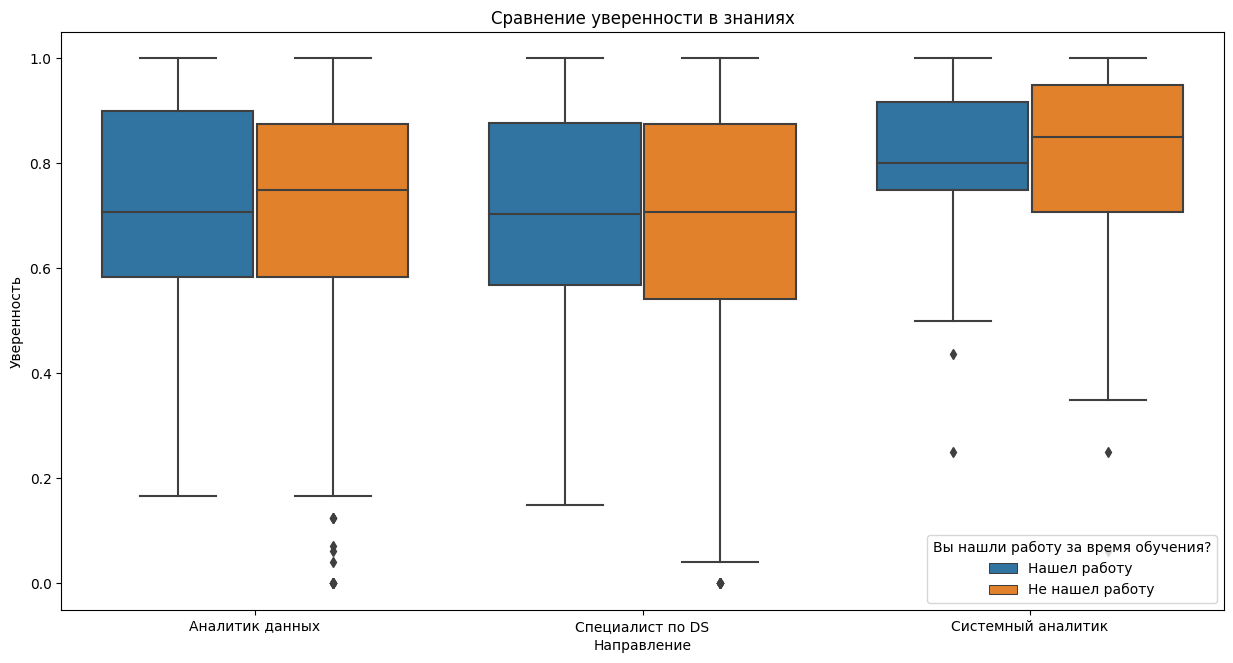

In [ ]:
plt.figure(figsize=(15,7.5))

sns.boxplot(y='scaled_confidence', x='profession', hue='Вы нашли работу за время обучения?', data=work_df)

plt.title('Сравнение уверенности в знаниях')
plt.xlabel('Направление')
plt.ylabel('Уверенность')
plt.show()

Закономерности между уверенностью студента в знаниях и нахождением работы не выявлено. 

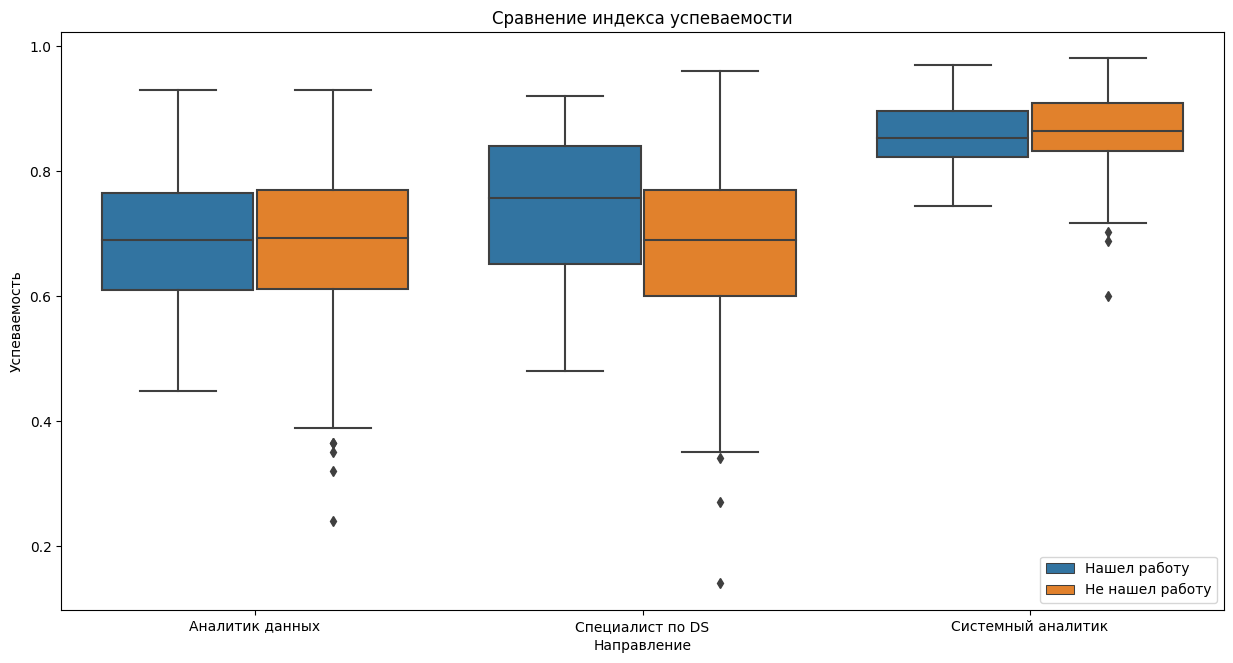

In [ ]:
plt.figure(figsize=(15,7.5))

sns.boxplot(y='lp_avg', x='profession', hue='Вы нашли работу за время обучения?', data=work_df)

plt.title('Сравнение индекса успеваемости')
plt.xlabel('Направление')
plt.ylabel('Успеваемость')
plt.legend(loc='lower right')
plt.show()

В плане успеваемости интересное наблюдение: те студенты дата саенс, которые смогли найти работу в течение обучения, имели лучшую успеваемость. По другим направлениям этого не заметно. 

## Вывод по нашедшим работу во время обучения

Среди особенностей людей, нашедших работу в течение обучения, можно отметить:  
- Большинство из них (78%) имеют опыт работы в айти;  
- Смена работы &mdash; не основная цель их обучения. Чаще работу находят те, кто идет на курсы для повышения квалификации, повышения зарплаты.  
- Связи между уверенностю в знаниях с нахождением работы не выявили, но заметили, что среди нашедших работу студентов Data Science успеваемость в среднем выше, чем у остальных студентов этого направления.  

# Вероятность рекомендации курса друзьям

In [ ]:
metrics_gr.head()

,user_id,profession_name,lp_avg,confidence,chance_of_recomendation
0,377,data-scientist,0.794,1.333333,NaN
1,774,data-analyst-plus,0.666,0.000000,NaN
2,802,data-analyst,0.865,0.000000,NaN
3,1282,data-analyst,0.570,0.500000,NaN
4,1400,data-scientist,0.750,0.250000,NaN


In [ ]:
# делаем срез по тем строкам, где есть ответы на наш вопрос
recomendation = metrics_gr[~metrics_gr['chance_of_recomendation'].isna()]

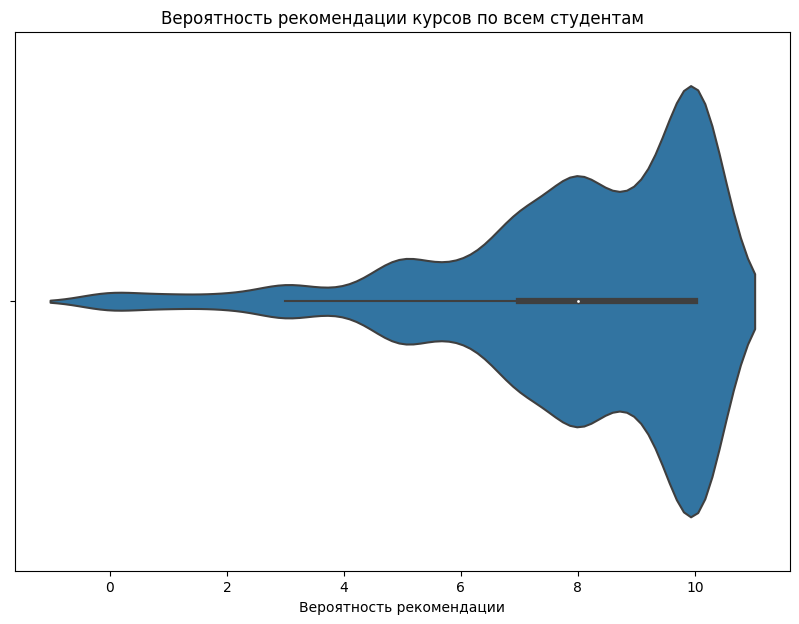

In [ ]:
# вероятность рекомендации в среднем по датасету
plt.figure(figsize=(10,7))
sns.violinplot(data=recomendation, x='chance_of_recomendation', orient='h')
plt.title('Вероятность рекомендации курсов по всем студентам')
plt.xlabel('Вероятность рекомендации');

По датасету в целом вероятность рекомендации 8 из 10 (по медиане). Распределение сильно смещено вправо, много ответов с высокой вероятностью рекомендации курсов. Однако также есть хвост в направлении нуля.  

Рассмотрим показатель в рамках наших групп. 

In [ ]:
prof = ['data-analyst', 'data-scie', 'systems-analyst']

In [ ]:
def get_df(prof, df):
	matching = [s for s in list(df['profession_name'].unique()) if prof in s]
	df_fin = df[df['profession_name'].isin(matching)]
	return df_fin

In [ ]:
da_rec = get_df(prof[0], recomendation)
ds_rec = get_df(prof[1], recomendation)
sa_rec = get_df(prof[2], recomendation)

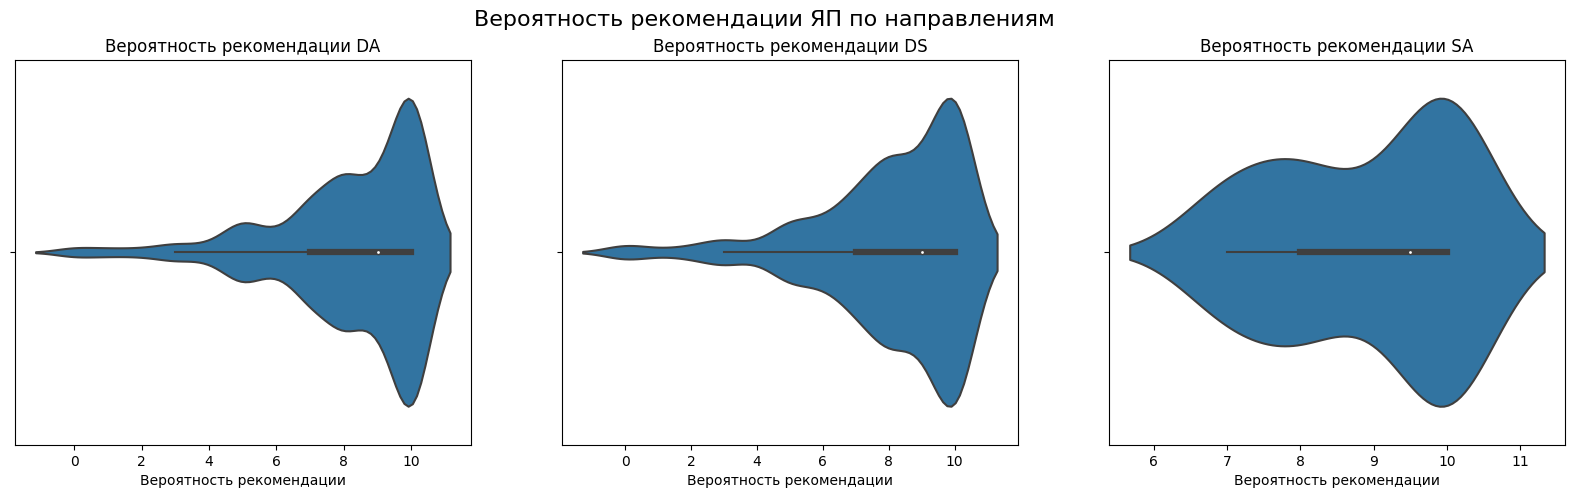

In [ ]:
plt.figure(figsize=(20,5))
plt.suptitle('Вероятность рекомендации ЯП по направлениям',fontsize=16)

plt.subplot(1,3,1)
sns.violinplot(data=da_rec, x='chance_of_recomendation', orient='h')
plt.title('Вероятность рекомендации DA')
plt.xlabel('Вероятность рекомендации')

plt.subplot(1,3,2)
sns.violinplot(data=ds_rec, x='chance_of_recomendation', orient='h')
plt.title('Вероятность рекомендации DS')
plt.xlabel('Вероятность рекомендации')

plt.subplot(1,3,3)
sns.violinplot(data=sa_rec, x='chance_of_recomendation', orient='h')
plt.title('Вероятность рекомендации SA')
plt.xlabel('Вероятность рекомендации')

plt.show()

In [ ]:
print(f"Вероятность рекомендации курсов от студентов DA: {'{:.2f}'.format(da_rec['chance_of_recomendation'].mean())}.")
print()
print(f"Вероятность рекомендации курсов от студентов DS: {'{:.2f}'.format(ds_rec['chance_of_recomendation'].mean())}.")
print()
print(f"Вероятность рекомендации курсов от студентов SA: {'{:.2f}'.format(sa_rec['chance_of_recomendation'].mean())}.")

Вероятность рекомендации курсов от студентов DA: 8.19.

Вероятность рекомендации курсов от студентов DS: 8.06.

Вероятность рекомендации курсов от студентов SA: 8.91.


## Вывод по вероятности рекомендации ЯП

В целом готовность рекомендовать курс примерно одинаковая по всем нашим направлениям. По системному анализу немного выше, по Data Science чуть ниже, и это соотносится со средней уверенностью в знаниях по этим направлениям: у студентов направления системного анализа самая высокая уверенность в знаниях, у студентов направления Data Science - самая низкая.  

Исходя из этого можно сформировать гипотезу: чем выше у студентов уверенность в знаниях, тем выше вероятность рекомендации ЯП друзьям и знакомым.

# Анализ сегментов

Разделим всех наших пользователей на два сегмента по следующим признакам:  
- студенты без опыта в айти и с невысокой уверенностью в знаниях;  
- студенты с опытом и уверенные в собственных знаниях.  

Мы хотим выявить, чем отличаются (и отличаются ли) эти группы людей, и на основе этого анализа выдвинуть гипотезы по улучшению помощи студентам Практикума.  

Делили студентов именно по таким признакам, чтобы сравнить самую на первый взгляд "уязвимую" категорию (без опыта) и тех, у кого проблем с прохождением курса и выполнения своей цели быть не должно. 

In [ ]:
# соберем отдельный датасет для нашего анализа
table = data_gen.copy()

Узнаем медианное значение уровня уверенности в собственных знаниях.

Установим: все, что выше этого значения - относится к студентам, уверенных в своих знаниях 

In [ ]:
md = table['scaled_confidence'].median()
md

0.75

Медианное значение уверенности в собственных знаниях `0.75`.  

Выделим обозначенные сегменты. 

## С опытом+уверенные

In [ ]:
# запишем студентов в группы
group_1 = table[(table['Был опыт в IT?_Нет опыта работы аналитиком и в IT.'] == 0) & (table['scaled_confidence'] > md)].copy()

print('Студентов c опытом+уверенные всего:', len(group_1))

Студентов c опытом+уверенные всего: 441


## Без опыта+неуверенные

In [ ]:
group_2 = table[(table['Был опыт в IT?_Нет опыта работы аналитиком и в IT.'] == 1) & (table['scaled_confidence'] <= md)].copy()
print('Студентов без опыта+неуверенные всего:', len(group_2))

Студентов без опыта+неуверенные всего: 1231


## Сравнение ответов на вопросы по студентам различных сегментов

Создадим функцию, которая построит `heatmap` по ответам студентов, разделенных на сегменты.

In [ ]:
def hm_questions():
    for i in range(len(radio_alias)):
        matching = [s for s in list(group_1.columns) if radio_alias[i] in s]
        group_1_hm = group_1[matching].T
        group_1_hm.loc[:,'Total'] = group_1_hm.sum(axis=1)
        group_1_hm = group_1_hm[['Total']]
        group_1_hm.columns = ['answers']
        group_1_hm['answers'] = group_1_hm['answers'].astype('int')
        group_1_hm = group_1_hm.sort_values('answers')
        group_1_hm['ratio'] = round(group_1_hm['answers']/group_1_hm['answers'].sum(), 2)

        matching = [s for s in list(group_2.columns) if radio_alias[i] in s]
        group_2_hm = group_2[matching].T
        group_2_hm.loc[:,'Total'] = group_2_hm.sum(axis=1)
        group_2_hm = group_2_hm[['Total']]
        group_2_hm.columns = ['answers']
        group_2_hm['answers'] = group_2_hm['answers'].astype('int')
        group_2_hm = group_2_hm.sort_values('answers')
        group_2_hm['ratio'] = round(group_2_hm['answers']/group_2_hm['answers'].sum(), 2)


        df_hm_group = group_2_hm[['ratio']].join(group_1_hm['ratio'], lsuffix='_gr2', rsuffix='_gr1').reset_index()

        df_hm_group['index'] = df_hm_group['index'].str.split('_').apply(lambda x: x[1])
        df_hm_group = df_hm_group.rename(columns={'ratio_gr2':'Без опыта, неуверенные', 'ratio_gr1':'С опытом, уверенные'})

        df_hm_group = df_hm_group.set_index('index')

        plt.figure(figsize=(8, 7.5))
        sns.heatmap(data=df_hm_group.sort_values('Без опыта, неуверенные', ascending=False), linewidths=0.5,
                    annot=True, fmt='.0%')
        plt.title(f'Ответы на вопрос \"{radio_alias[i]}\"\n')
        plt.xlabel('Сегмент')
        plt.ylabel(None)
        plt.yticks(rotation=0)
        plt.show()

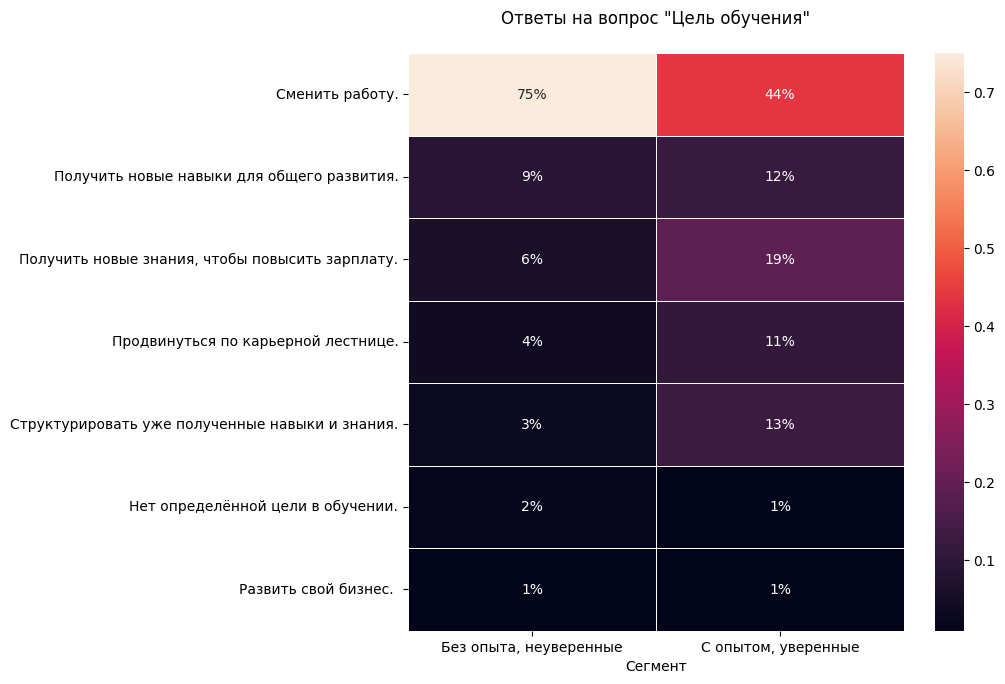

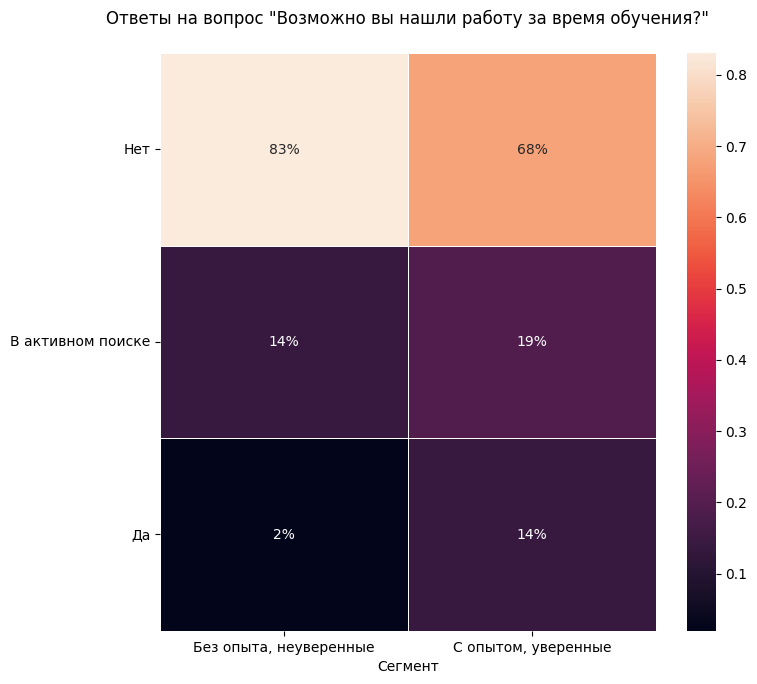

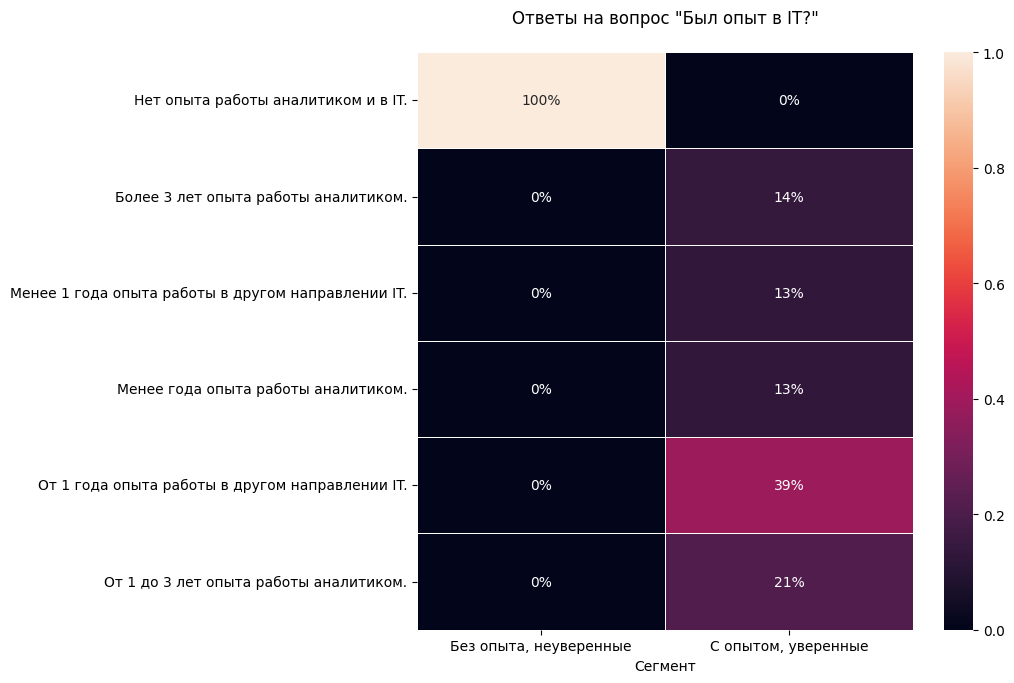

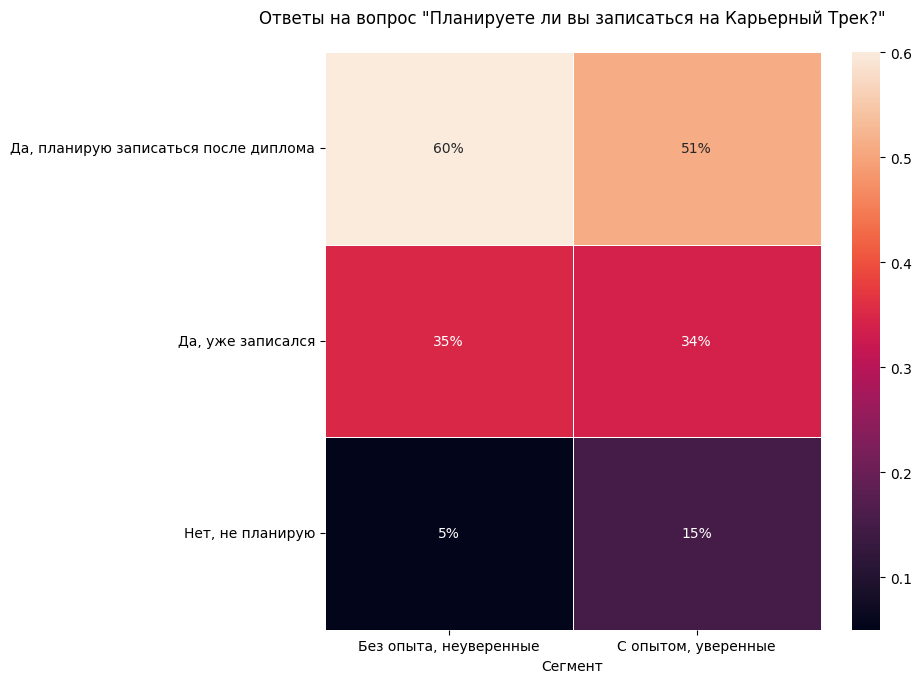

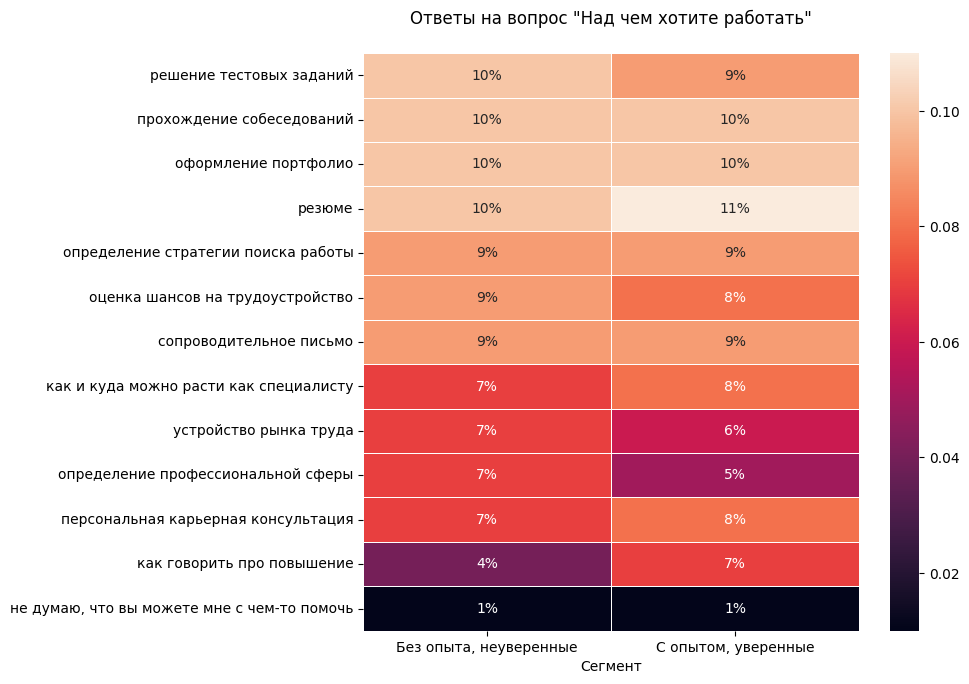

In [ ]:
# выводим графики
hm_questions()










### Выводы по ответам на вопросы

- Те студенты, у которых имеется какой-либо опыт в IT, имеют цель сменить работу только в 44% случаев. Для 75% студентов без опыта это основная цель.  

- Студенты с опытом и уверенные закономерно чаще находят работу во время обучения, в 14% против 2% для студентов без опыта и неуверенные.

- Студенты с опытом и уверенные чаще всего имеют опыт в другом направлении IT от 1 года - 39%. Еще 21% имеет опыт в аналитике от 1 года до 3 лет.

- Студенты с опытом и уверенные тем не менее планирую записаться на карьерный трек или уже это сделали и особенно хотят поработать над созданием резюме. Их чаще интересует, как говорить про повышение, и в меньшей степени &mdash; определение профессиональной сферы. 

## Сравнение индекса успеваемости и уверенности в своих знаниях по сегментам

In [ ]:
# добавим в таблицу столбец Group, в который запишем индикатор,
# чтобы можно было использовать параметр hue 
group_1['Group'] = 'A'
group_2['Group'] = 'B'

In [ ]:
# объединяем таблицы
segment_conf = pd.concat([group_1, group_2], axis=0)

In [ ]:
# подготовим датасет для построения графика
df_bar_conf_group = segment_conf[['Group', 'lp_avg', 'scaled_confidence']]

test_plot_group = df_bar_conf_group.groupby('Group').agg({'lp_avg':'mean', 'scaled_confidence':'mean'}).T.reset_index()

In [ ]:
# формируем данные по каждому сегменту в отдельности
group1_test = test_plot_group[['index', 'A']].copy()
group1_test['Сегмент'] = 'С опытом, уверенны'
group1_test = group1_test.rename(columns={'A':'val'})

group2_test = test_plot_group[['index', 'B']].copy()
group2_test['Сегмент'] = 'Без опыта, неуверенный'
group2_test = group2_test.rename(columns={'B':'val'})

In [ ]:
# объединаяем, создавая таблицу с удобным порядком столбцов
plot_df_group = pd.concat(
    [
    group1_test[['Сегмент', 'val', 'index']],
    group2_test[['Сегмент', 'val', 'index']]
    ],
    axis = 0
)

# округляем дроби
plot_df_group['val'] = round(plot_df_group['val'], 2)

# переводим значения на русский для отображения на графике
plot_df_group = plot_df_group.replace('lp_avg', 'Индекс успеваемости').replace('scaled_confidence', 'Уверенность в собственных знаниях')

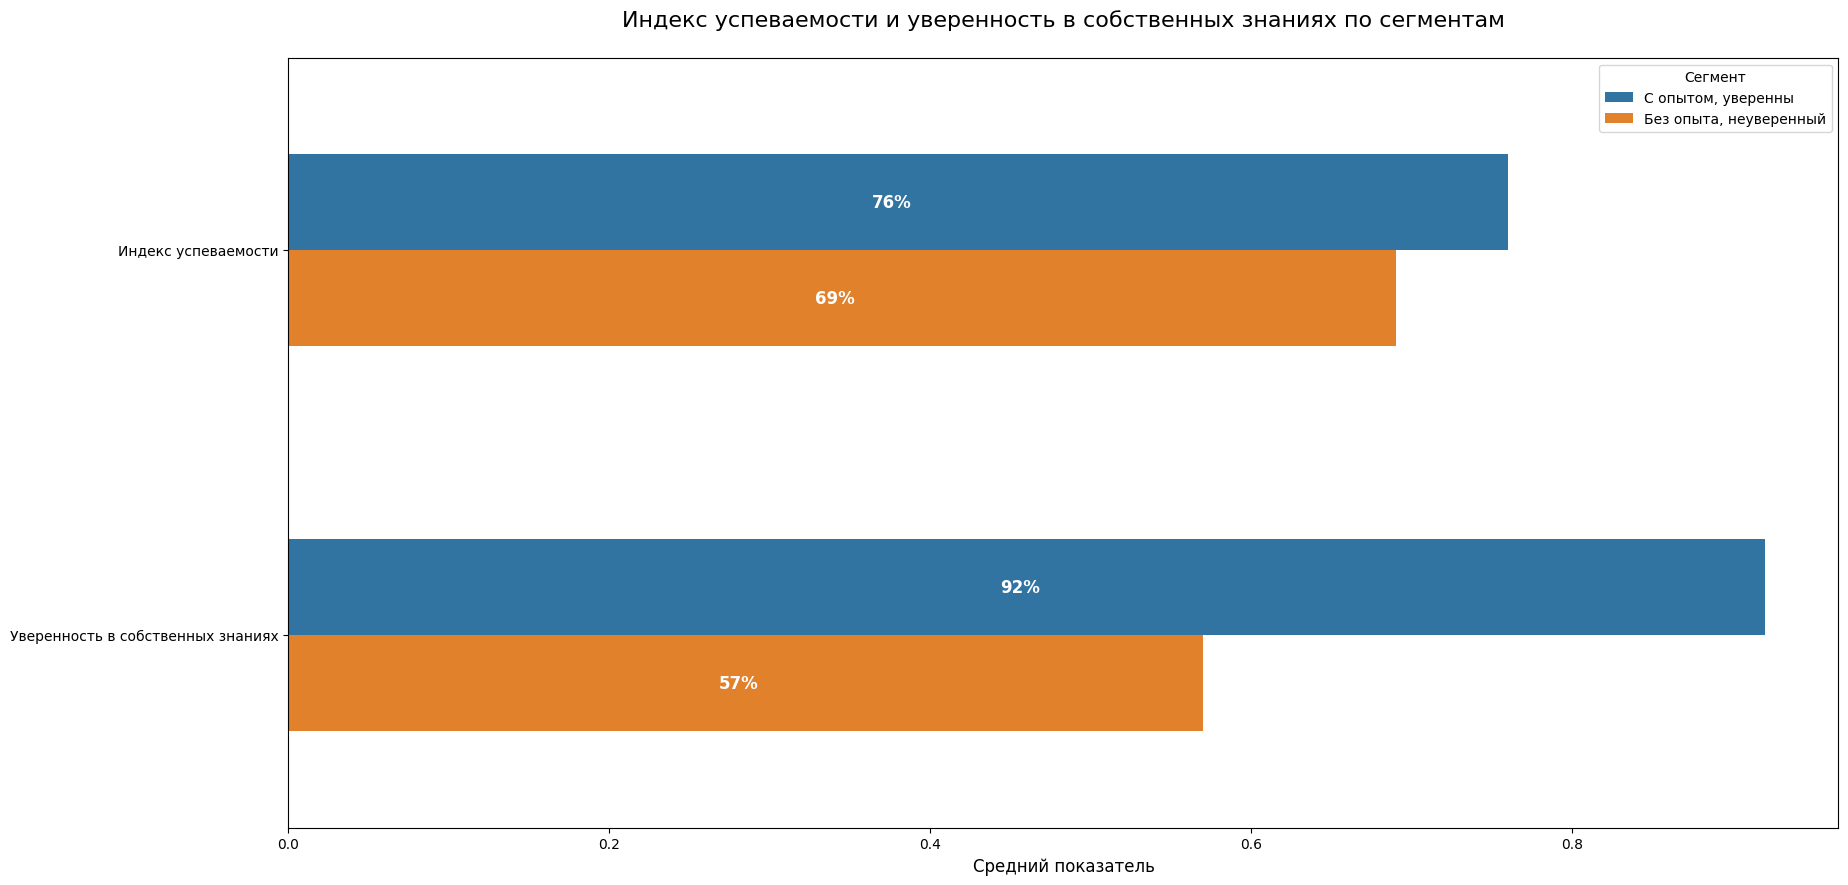

In [ ]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(data=plot_df_group, x='val', y='index', hue='Сегмент',
                    width=.5)
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0%'),
                  ((bar.get_x() + bar.get_width()/2),
                  bar.get_y()), ha='center', va='center',
                  size=12, xytext=(-5, -35),
                  textcoords='offset points', color='white', fontweight='bold')
    
plt.title('Индекс успеваемости и уверенность в собственных знаниях по сегментам\n', fontsize=16)
plt.xlabel("Средний показатель", fontsize=12)
plt.ylabel(None);

### Вывод по успеваемости и уверенности в знаниях по сегментам

Закономерно, студенты с опытом и уверенные в собственных знаниях показывают лучший индекс успеваемости, нежели студенты без опыта. Однако уверенность в знаниях у них отличается гораздо сильнее, чем реальный показатель успеваемости. 

## Распределение по источникам оплаты

In [ ]:
df_segment_group = segment_conf.groupby(['Group', 'current_segment'])[['user_id']].nunique().reset_index()
df_segment_group['sum'] = df_segment_group.groupby('Group')[['user_id']].transform('sum')
df_segment_group['ratio'] = df_segment_group['user_id']/df_segment_group['sum']

In [ ]:
# для графика переводим название колонки на русский
df_segment_group = df_segment_group.rename(columns={'current_segment':'Источник оплаты'})

df_segment_group = df_segment_group.replace('A', 'С опытом, уверенный').replace('B', "Без опыта, неуверенный")

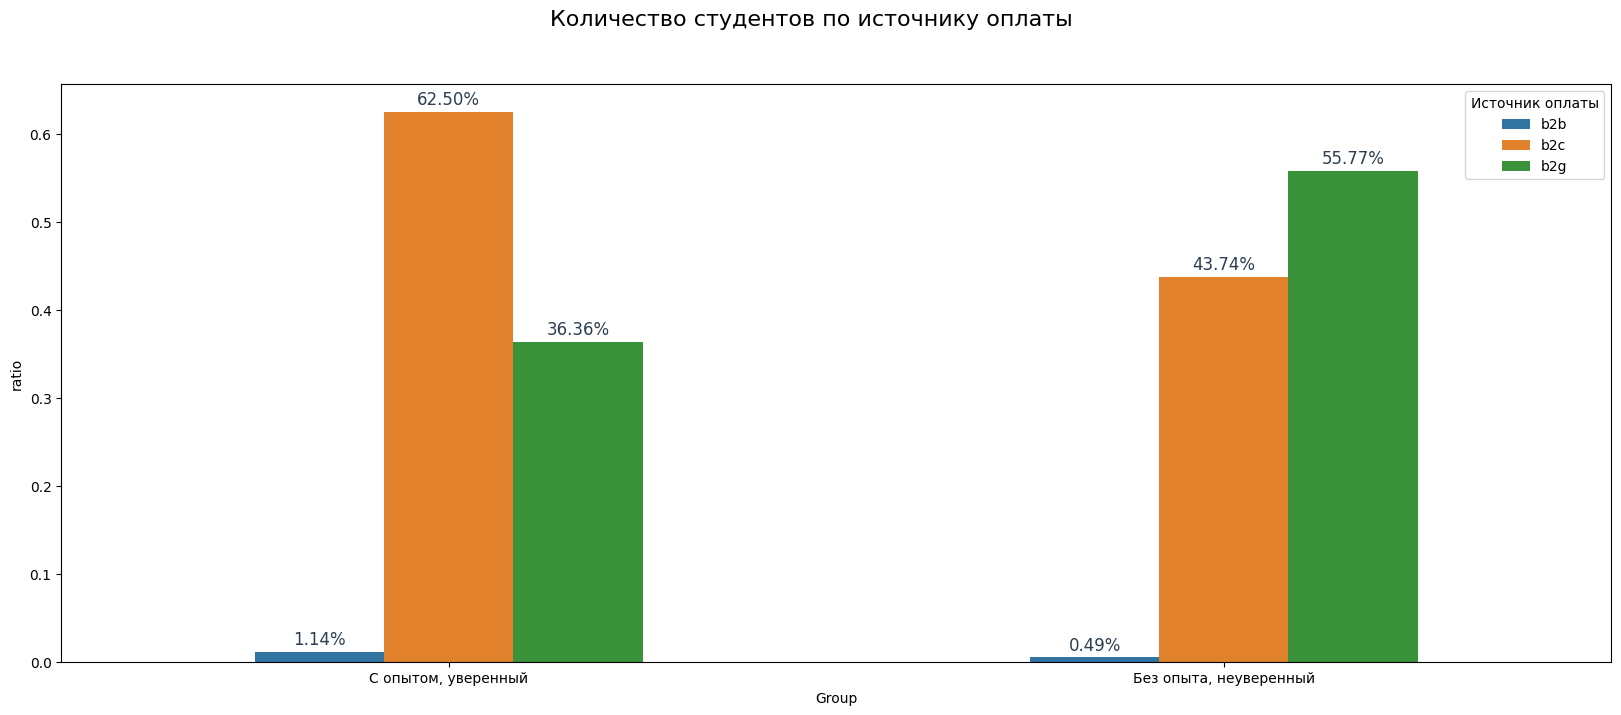

In [ ]:
plt.figure(figsize=(20,7.5))
plt.suptitle('Количество студентов по источнику оплаты\n', fontsize=16)

plots = sns.barplot(data=df_segment_group, 
            x='Group', y='ratio', hue='Источник оплаты', width=.5)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2%'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(0,9),
                  textcoords='offset points', color='#2c3e50')

### Вывод по источникам оплаты

Студенты без опыта и неуверенные в своих знаниях чаще приходят по программам от государства - в 55% случаев. У студентов с опытом этот показатель равен 36%

От бизнеса в обоих случаях около 1%

Студенты с опытом в 62% оплачивают курсы сами, без опыта только в 44%

## Вывод по сегментам пользователей

Разделив студентов на два сегмента: с опытом+уверенные в себе и без опыта+с низкой уверенностью мы заметили следующие моменты:  
- Между этими сегментами очень сильно отличается доля студентов, которые трудоустроились во время обучения: 14% против 2%.  
- Четверть студентов из первой группы имеют опыт до года в релевантной или смежной сфере.  
- Опытные студенты имеют более высокий уровень успеваемости, однако разница в уверенности в знаниях между нашими группами существенно выше, чем разница в уровне знаний. 

Мы заметили в ходе анализа сегментов, что большая часть студентов с опытом имеют не очень большой опыт (самые популярные ответы "До года" и "От 1 до 3 лет), при этом у них значительно выше уверенность в собственных знаниях. Можно предположить, что даже наличие минимального опыта оказывает существенное влияние на уверенность, и как следствие на достижение цели. 

# Выводы по исследованию

В ходе исследования мы ознакомились с данными опросов студентов на курсе по трудоустройству и показателями их успеваемости.

Всего мы располагаем данными о студентах `10 курсов`, представленными на платформе Яндекс Практикум.  

Их можно объединить в три большие направления: `Аналитик данных`, `Специалист по Data Science` и `Системный аналитик`. Так мы и сделали.  

<img src="https://i.imgur.com/55eBXtq.png" width=600 />

Таким образом, можно выделить следующие портреты студентов __трех основных направлений__:

__Аналитика данных и Data Science__

Эти направления очень похожи.
В основном студенты этих направлений только входят в IT. У них почти нет опыта и основная цель &mdash; сменть работу. Более половины учатся по программам от государства.  

__Системная аналитика__

На курсах по системному анализу учатся люди с опытом работы в IT, которых хотят добиться повышения, карьерного роста или просто структурировать имеющиеся знания. Обучение на этом курсе студенты оплачивают самостоятельно.    

**Показатели студентов трех основных направлений:**

Среди трех групп System Analyst имеют самый высокий индекс успеваемости и уверенности в собственных знаниях. У Data Analyst и Data Science равные показатели по успеваемости, но вторые имеют меньшую уверенность в знаниях.

<img src="https://i.imgur.com/ikM31V2.png" width=900 />

Также системные аналитики показывают самую высокую вероятность рекомендовать ЯП друзьям и знакомым. Самый низкий показатель по вероятности рекомендации у студентов направления Data Science. Существует умеренная корреляция между шансом порекомендовать курс и уверенностью в собственных знаниях студента. Это соотносится со средней уверенностью в знаниях по этим направлениям: у студентов направления системного анализа самая высокая уверенность в знаниях, у студентов направления Data Science &mdash; самая низкая.

Системные аналитики гораздо чаще находят работу во время обучения (16% студентов) по сравнению с Аналитиками данных и Data Science (4%).  
<img src="https://i.imgur.com/ETNBxgm.png" width=600 />

В академ чаще уходят Data Analyst (9,3%), реже &mdash; студенты Data Science (4,5%). Системные аналитики берут перерывы крайне редко &mdash; только 1,9% студентов были в отпуске.

**Показатели студентов по сегментам: С опытом+уверенные/Без опыта+неуверенные**

Разделив студентов на два сегмента: *с опытом+уверенные в собственных знаниях* и *без опыта+с низкой уверенностью* мы заметили следующие моменты:  

- Цель `Сменить работу` является основной для сегмента студентов "Без опыта+неуверенные" (75%). Этот же показатель равен 44% для студентов с опытом+уверенные.   
- Между этими сегментами очень сильно отличается доля студентов, которые трудоустроились во время обучения: 14% против 2%.  
<img src="https://i.imgur.com/85ovtIz_d.webp?maxwidth=760&fidelity=grand" width=600 />  

- Четверть студентов из первой группы имеют опыт до года в релевантной или смежной сфере.
<img src="https://i.imgur.com/HwfjRux_d.webp?maxwidth=760&fidelity=grand" width=600 />  

- Опытные студенты имеют более высокий уровень успеваемости (76% к 69%), однако разница в уверенности в знаниях между нашими группами существенно выше, чем разница в уровне знаний (92% к 57%). 
<img src="https://i.imgur.com/kMM9LjS.png" width=900 />  

Рассмотрев студентом по разным группам (по направлениям обучения и по выделенным сегментам) мы заметили, что уверенные в своих знаниях ученики трудоустраиваются чаще, чем те, кто испытывает неуверенность. При этом уверенность в знаниях не всегда напрямую связана с успеваемостью. 


__Гипотезы по улучшению поддержки студентов__  

Мы заметили, что несмотря на схожую успеваемость студенты направления дата саенс чувствуют себя менее уверенными, чем студенты курса аналитики. Вероятно, курс ощущается слишком сложным. Так как большая часть студентов имеет целью сменить работу, то уверенность в знаниях им нужна для прохождения собеседований и решения тестовых заданий.  
- `Если дать студентам больше возможностей поучаствовать в мок-интервью, они будут чувствовать себя увереннее на собеседованиях, при решение тестовых заданий, и это поможет им достигать цели.`

Также это может сказаться на количестве рекомендаций курса друзьям, так как мы выявили корреляцию между показателями уверенности в собственных знаниях и вероятности рекомендации. 

Еще необходимо отметить, что среди нашедших работу во время обучения 78% студентов с опытом в айти. 
Вероятно, мы сможем помочь студентам чаще достигать своей цели, если добавим больше практических проектов.  
- `Если увеличить количество проектов мастерской, у студентов будет больше возможности наработать практический опыт, и это поможет им лучше достигать цели`.